# Import libraries and load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/Pipbytes/datasets/refs/heads/main/Regression/Ames_Housing_Data.csv'
df = pd.read_csv(url)
df.head()

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  526301100           20        RL         141.0     31770   Pave   NaN   
1  526350040           20        RH          80.0     11622   Pave   NaN   
2  526351010           20        RL          81.0     14267   Pave   NaN   
3  526353030           20        RL          93.0     11160   Pave   NaN   
4  527105010           60        RL          74.0     13830   Pave   NaN   

  Lot Shape Land Contour Utilities  ... Pool Area Pool QC  Fence Misc Feature  \
0       IR1          Lvl    AllPub  ...         0     NaN    NaN          NaN   
1       Reg          Lvl    AllPub  ...         0     NaN  MnPrv          NaN   
2       IR1          Lvl    AllPub  ...         0     NaN    NaN         Gar2   
3       Reg          Lvl    AllPub  ...         0     NaN    NaN          NaN   
4       IR1          Lvl    AllPub  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  SalePrice  
0        0       5    2010        WD           Normal     215000  
1        0       6    2010        WD           Normal     105000  
2    12500       6    2010        WD           Normal     172000  
3        0       4    2010        WD           Normal     244000  
4        0       3    2010        WD           Normal     189900  

[5 rows x 81 columns]

## Data description

In [ ]:
import requests

url = "https://raw.githubusercontent.com/Pipbytes/datasets/refs/heads/main/Regression/Ames_Housing_Feature_Description.txt"

response = requests.get(url)

if response.status_code == 200:
  print(response.text)
else: print(f"Failed to retrieve file. Status code: {response.status_code}.")


MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

# Feature Engineering

## Data inspection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [ ]:
df.describe()

PID  MS SubClass  Lot Frontage       Lot Area  Overall Qual  \
count  2.930000e+03  2930.000000   2440.000000    2930.000000   2930.000000   
mean   7.144645e+08    57.387372     69.224590   10147.921843      6.094881   
std    1.887308e+08    42.638025     23.365335    7880.017759      1.411026   
min    5.263011e+08    20.000000     21.000000    1300.000000      1.000000   
25%    5.284770e+08    20.000000     58.000000    7440.250000      5.000000   
50%    5.354536e+08    50.000000     68.000000    9436.500000      6.000000   
75%    9.071811e+08    70.000000     80.000000   11555.250000      7.000000   
max    1.007100e+09   190.000000    313.000000  215245.000000     10.000000   

       Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  \
count   2930.000000  2930.000000     2930.000000   2907.000000   2929.000000   
mean       5.563140  1971.356314     1984.266553    101.896801    442.629566   
std        1.111537    30.245361       20.860286    179.112611    455.590839   
min        1.000000  1872.000000     1950.000000      0.000000      0.000000   
25%        5.000000  1954.000000     1965.000000      0.000000      0.000000   
50%        5.000000  1973.000000     1993.000000      0.000000    370.000000   
75%        6.000000  2001.000000     2004.000000    164.000000    734.000000   
max        9.000000  2010.000000     2010.000000   1600.000000   5644.000000   

       ...  Wood Deck SF  Open Porch SF  Enclosed Porch   3Ssn Porch  \
count  ...   2930.000000    2930.000000     2930.000000  2930.000000   
mean   ...     93.751877      47.533447       23.011604     2.592491   
std    ...    126.361562      67.483400       64.139059    25.141331   
min    ...      0.000000       0.000000        0.000000     0.000000   
25%    ...      0.000000       0.000000        0.000000     0.000000   
50%    ...      0.000000      27.000000        0.000000     0.000000   
75%    ...    168.000000      70.000000        0.000000     0.000000   
max    ...   1424.000000     742.000000     1012.000000   508.000000   

       Screen Porch    Pool Area      Misc Val      Mo Sold      Yr Sold  \
count   2930.000000  2930.000000   2930.000000  2930.000000  2930.000000   
mean      16.002048     2.243345     50.635154     6.216041  2007.790444   
std       56.087370    35.597181    566.344288     2.714492     1.316613   
min        0.000000     0.000000      0.000000     1.000000  2006.000000   
25%        0.000000     0.000000      0.000000     4.000000  2007.000000   
50%        0.000000     0.000000      0.000000     6.000000  2008.000000   
75%        0.000000     0.000000      0.000000     8.000000  2009.000000   
max      576.000000   800.000000  17000.000000    12.000000  2010.000000   

           SalePrice  
count    2930.000000  
mean   180796.060068  
std     79886.692357  
min     12789.000000  
25%    129500.000000  
50%    160000.000000  
75%    213500.000000  
max    755000.000000  

[8 rows x 38 columns]

In [ ]:
df = df.drop('PID', axis=1)

## Missing values

1. Fillna() with 0 or None.

2. Drop rows or columns.

3. Feature engineering w imputation.

### Check missing values Part1

In [ ]:
df_null = df.isnull().sum()
df_null[df_null > 0].sort_values(ascending=False)

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Yr Blt      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Half Bath       2
Bsmt Full Bath       2
BsmtFin SF 1         1
Garage Cars          1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Electrical           1
dtype: int64

### Handle missing values by percentage

If dont convert the into percentage, some features are not visible.

In [ ]:
def percent_missing(df):
  percent_nan = df.isnull().sum() / len(df) * 100
  percent_nan = percent_nan[percent_nan > 0]
  percent_nan = percent_nan.sort_values()
  return percent_nan

In [ ]:
percent_nan = percent_missing(df)
percent_nan

Electrical         0.034130
Garage Cars        0.034130
BsmtFin SF 1       0.034130
Garage Area        0.034130
BsmtFin SF 2       0.034130
Bsmt Unf SF        0.034130
Total Bsmt SF      0.034130
Bsmt Half Bath     0.068259
Bsmt Full Bath     0.068259
Mas Vnr Area       0.784983
Bsmt Qual          2.730375
Bsmt Cond          2.730375
BsmtFin Type 1     2.730375
BsmtFin Type 2     2.764505
Bsmt Exposure      2.832765
Garage Type        5.358362
Garage Qual        5.426621
Garage Cond        5.426621
Garage Yr Blt      5.426621
Garage Finish      5.426621
Lot Frontage      16.723549
Fireplace Qu      48.532423
Mas Vnr Type      60.580205
Fence             80.477816
Alley             93.242321
Misc Feature      96.382253
Pool QC           99.556314
dtype: float64

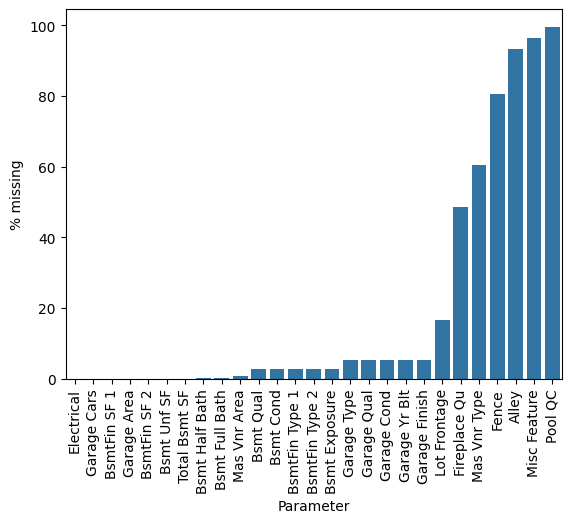

In [ ]:
# Bar plot of % of missing values
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.ylabel("% missing")
plt.xlabel('Parameter')
plt.xticks(rotation=90)
plt.show();

<h3>First check if the missing data can be replace by fillna() or average values.</h3>

<h4>Start with lower percentage features</h4>



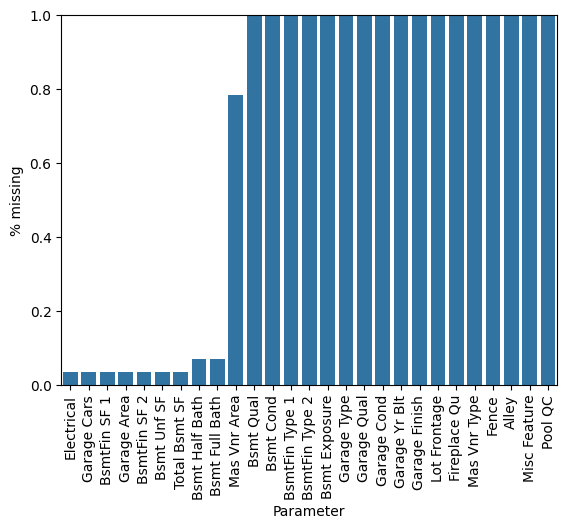

In [ ]:
# Narrowed down to remove lower % missing values
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0, 1) # Set x% thresold
plt.ylabel("% missing")
plt.xlabel('Parameter')
plt.show();

In [ ]:
percent_nan[percent_nan <= 1]

Electrical        0.034130
Garage Cars       0.034130
BsmtFin SF 1      0.034130
Garage Area       0.034130
BsmtFin SF 2      0.034130
Bsmt Unf SF       0.034130
Total Bsmt SF     0.034130
Bsmt Half Bath    0.068259
Bsmt Full Bath    0.068259
Mas Vnr Area      0.784983
dtype: float64

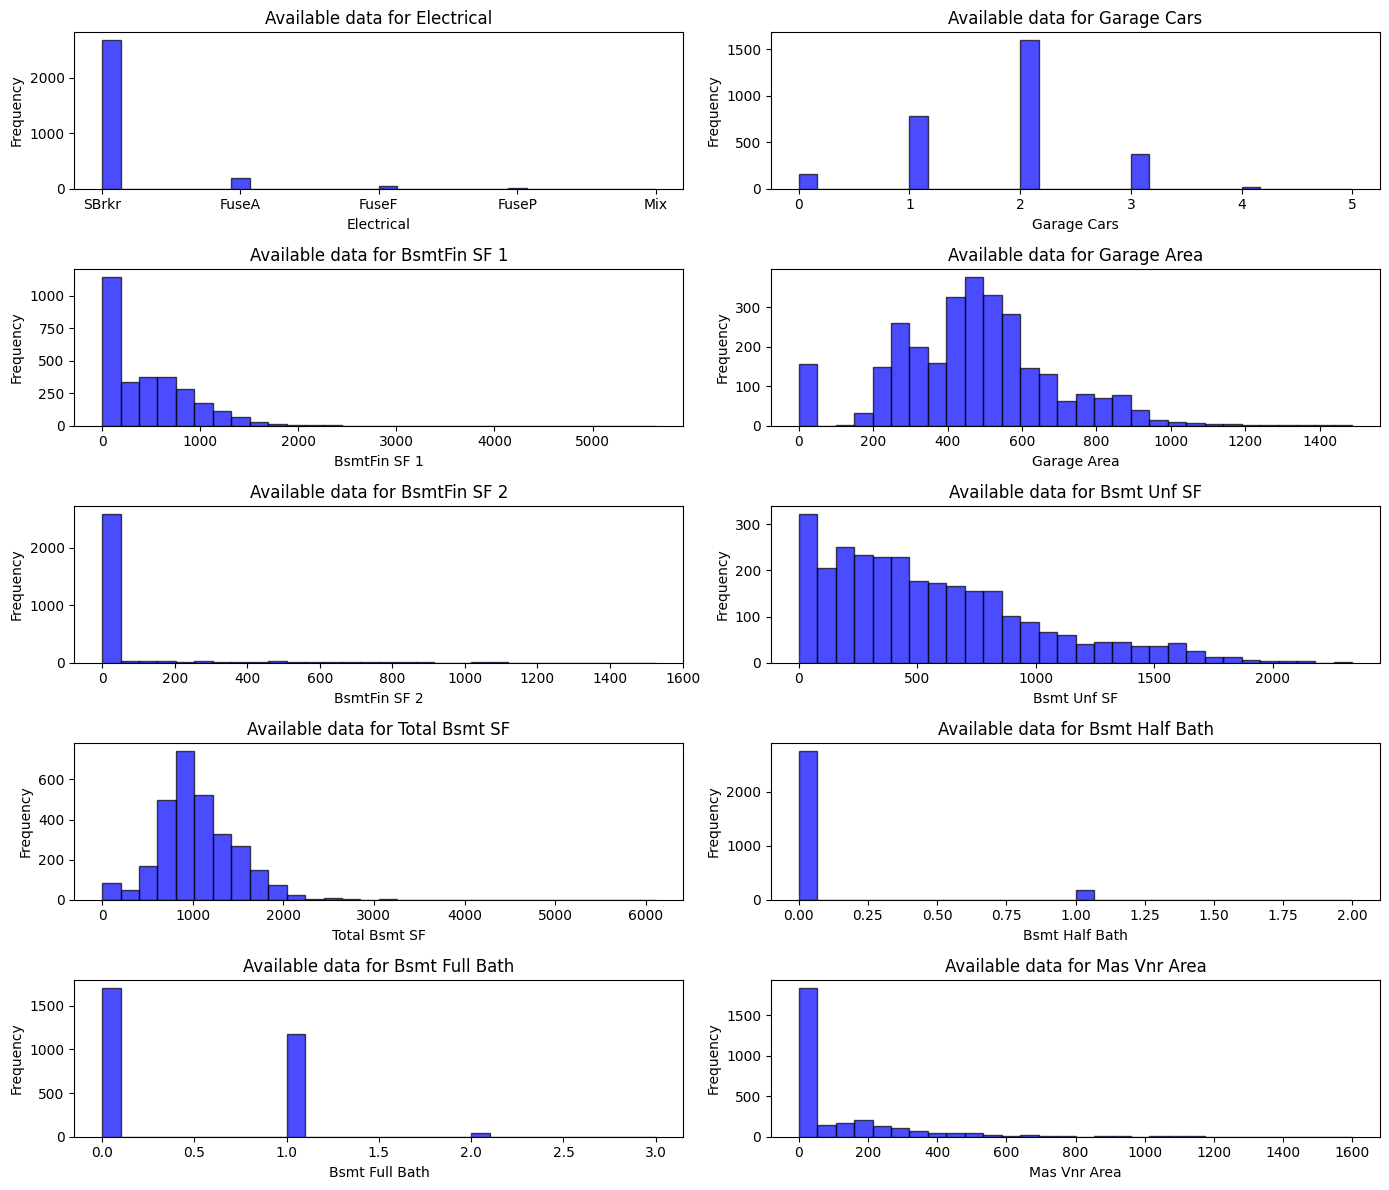

In [ ]:
features = [i for i in percent_nan[percent_nan <= 1].index]

# Set up subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 12), tight_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot a histogram for each feature
for i, feature in enumerate(features):
    axes[i].hist(df[feature].dropna(), bins=30, color='blue', alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Available data for {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
df[df['Bsmt Half Bath'].isnull()]

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
1341           20        RM          99.0      5940   Pave   NaN       IR1   
1497           20        RL         123.0     47007   Pave   NaN       IR1   

     Land Contour Utilities Lot Config  ... Pool Area Pool QC  Fence  \
1341          Lvl    AllPub        FR3  ...         0     NaN  MnPrv   
1497          Lvl    AllPub     Inside  ...         0     NaN    NaN   

     Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  Sale Condition  \
1341          NaN        0       4     2008      ConLD         Abnorml   
1497          NaN        0       7     2008        WD           Normal   

      SalePrice  
1341      79000  
1497     284700  

[2 rows x 80 columns]

In [ ]:
df.loc[1339:1344, 'Bsmt Half Bath']

1339    0.0
1340    0.0
1341    NaN
1342    1.0
1343    0.0
1344    0.0
Name: Bsmt Half Bath, dtype: float64

### Fill missing values with fillna()

<h4>There are 2 types of basement featuresm numerical or string. </h4>

1. Fillna() on numerical columns with 0.
2. fillna() on string columnns with None.

In [ ]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [ ]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

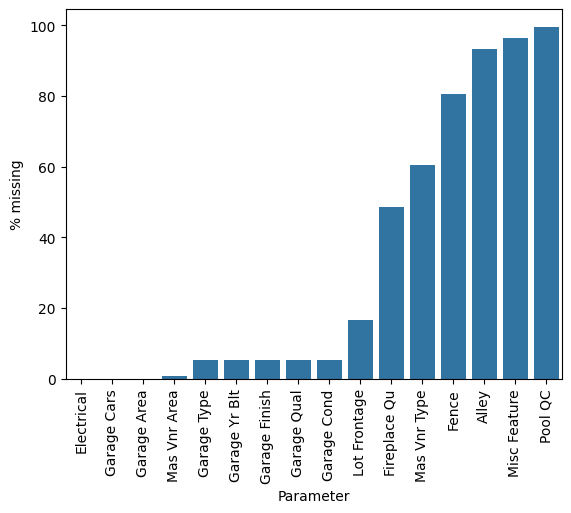

In [ ]:
# recalculate the missing values (%) by features
percent_nan = percent_missing(df)

# Bar plot of % of missing values
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.ylabel("% missing")
plt.xlabel('Parameter')
plt.xticks(rotation=90)
plt.show();

### Drop rows for missing values

In [ ]:
df = df.dropna(axis=0,subset= ['Electrical','Garage Cars'])

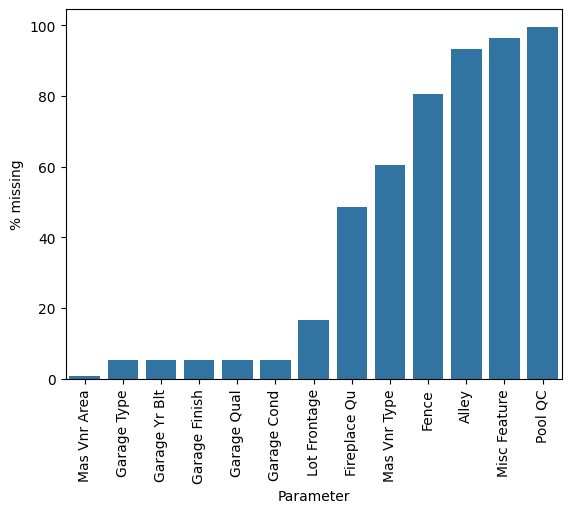

In [ ]:
# recalculate the missing values (%) by features
percent_nan = percent_missing(df)

# Bar plot of % of missing values
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.ylabel("% missing")
plt.xlabel('Parameter')
plt.xticks(rotation=90)
plt.show();

### Check missing values Part2

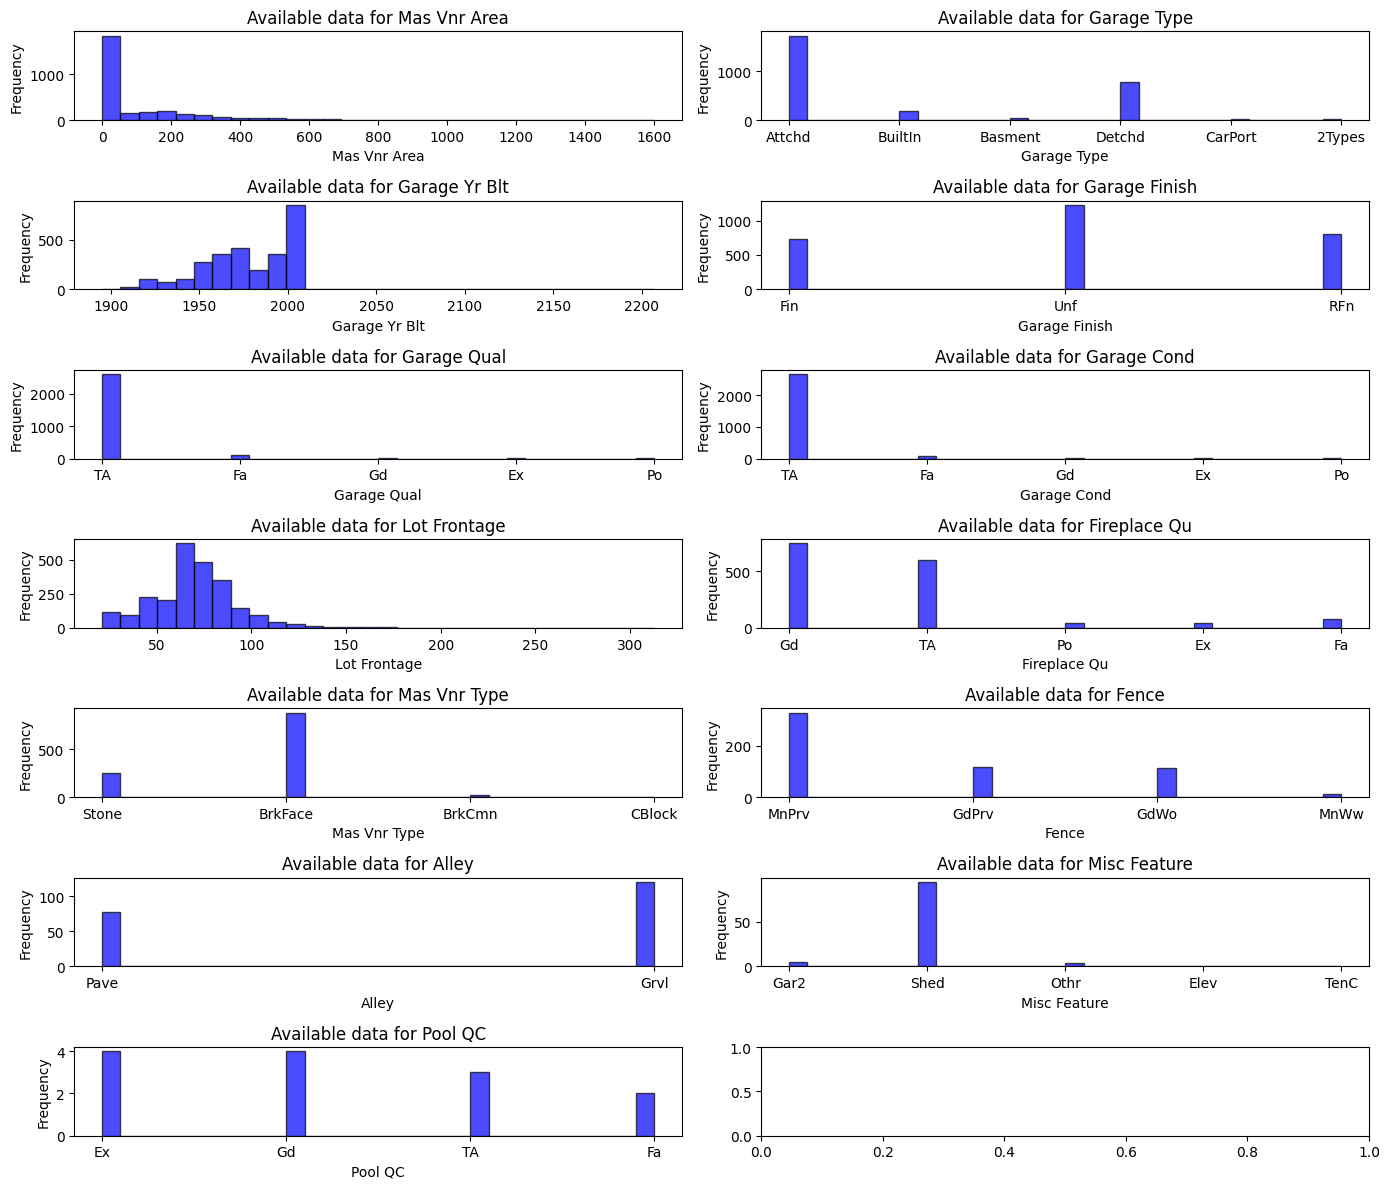

In [ ]:
features = [i for i in percent_nan.index]

# Set up subplots
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 12), tight_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot a histogram for each feature
for i, feature in enumerate(features):
    axes[i].hist(df[feature].dropna(), bins=30, color='blue', alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Available data for {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

### Fill missing values with fillna()

<h4>I would assume that Mas Vnr Type and Mas Vnr Area missing values likely due to the house simply just doesn't have a masonry veneer. In this case, I will use fillna() approach </h4>.

In [ ]:
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")

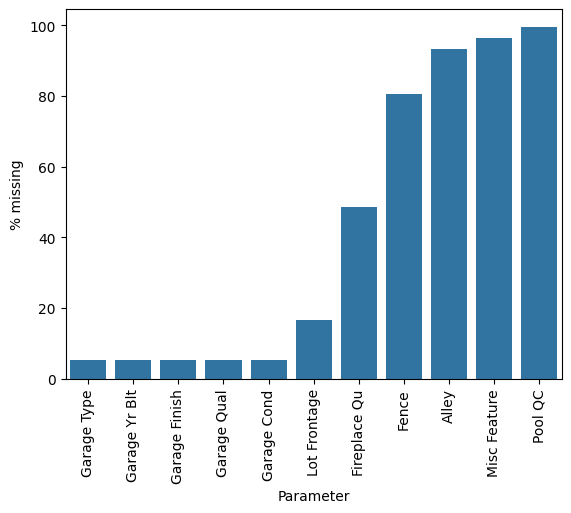

In [ ]:
# recalculate the missing values (%) by features
percent_nan = percent_missing(df)

# Bar plot of % of missing values
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.ylabel("% missing")
plt.xlabel('Parameter')
plt.xticks(rotation=90)
plt.show();

In [ ]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [ ]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

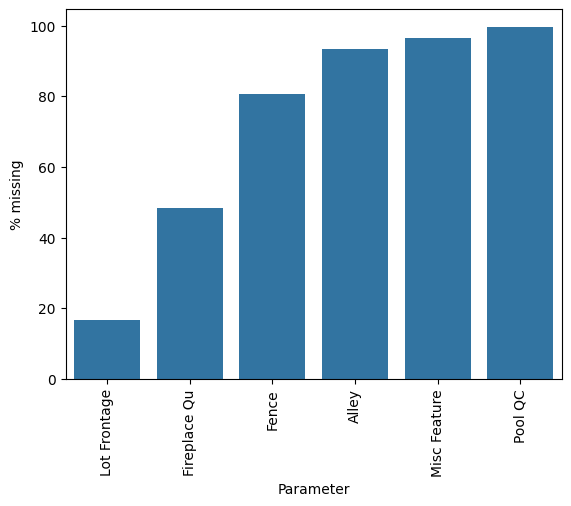

In [ ]:
# recalculate the missing values (%) by features
percent_nan = percent_missing(df)

# Bar plot of % of missing values
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.ylabel("% missing")
plt.xlabel('Parameter')
plt.xticks(rotation=90)
plt.show();

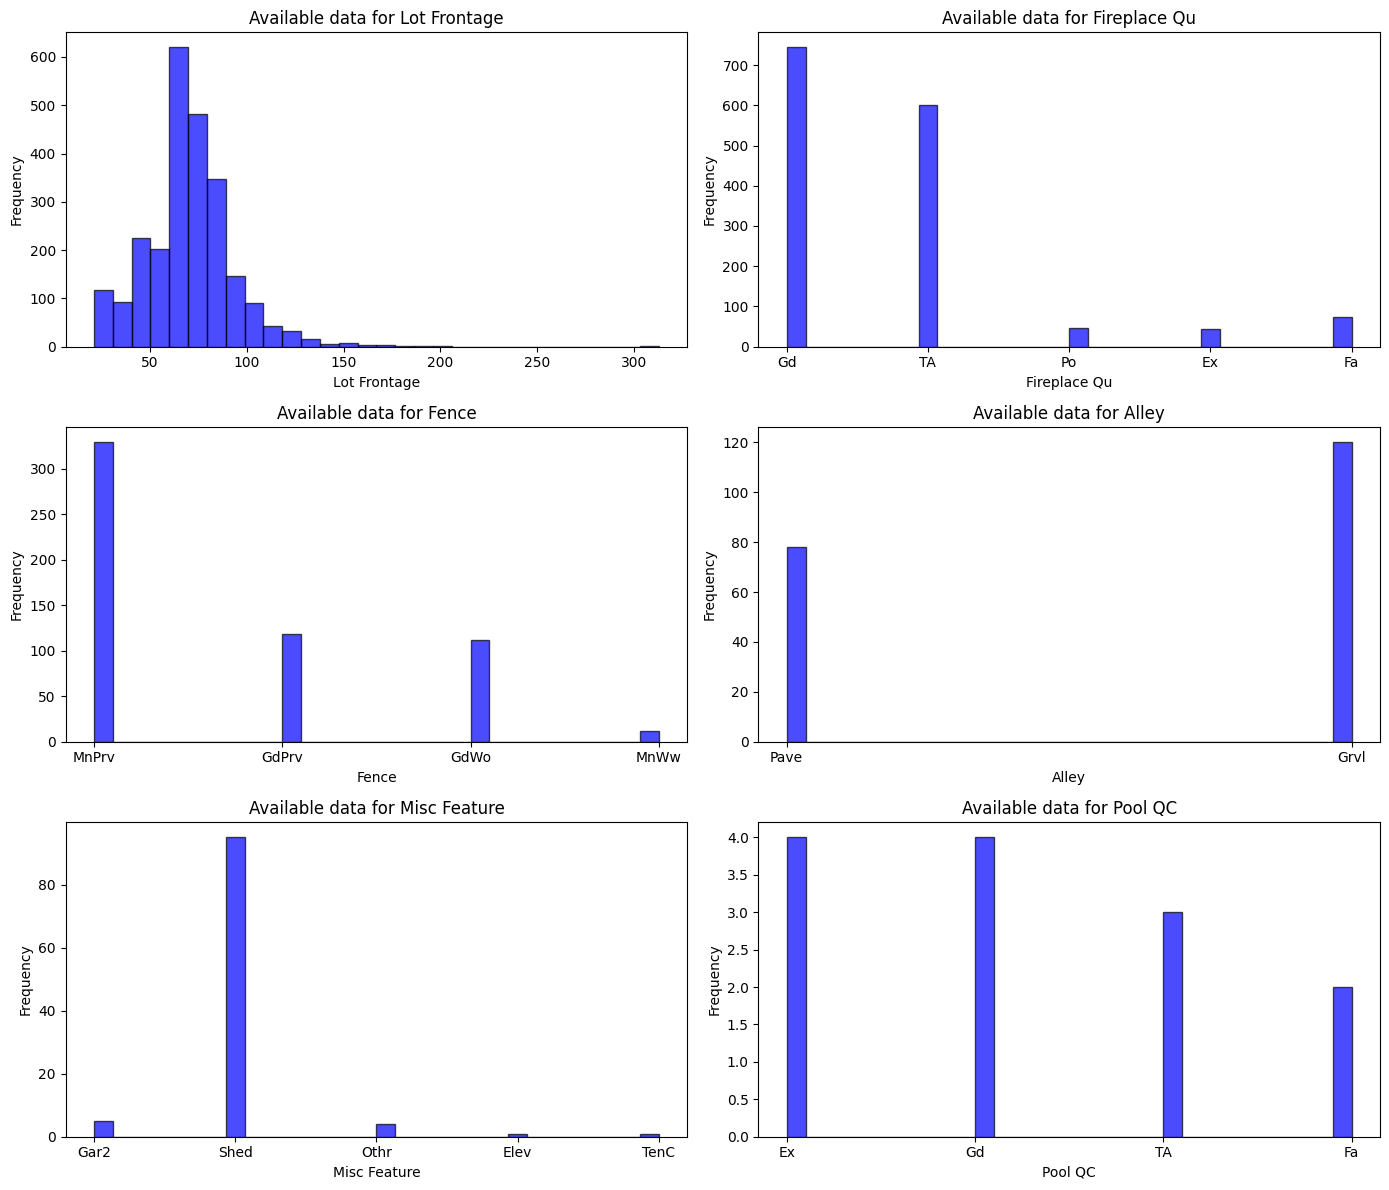

In [ ]:
features = [i for i in percent_nan.index]

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12), tight_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot a histogram for each feature
for i, feature in enumerate(features):
    axes[i].hist(df[feature].dropna(), bins=30, color='blue', alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Available data for {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

### Drop feature columns

<h4>Since the remaining features have large percentage of missing values (>=80%), i would be reasonable to remove the features from the data, than handling the missing data as majority of the data 0 or None. Except feature columns for <b>Lot Fronttage</b> and <b>Fireplace Qu</b>. </h4>

In [ ]:
features = [i for i in percent_nan.index][2:]

df = df.drop(features, axis=1)

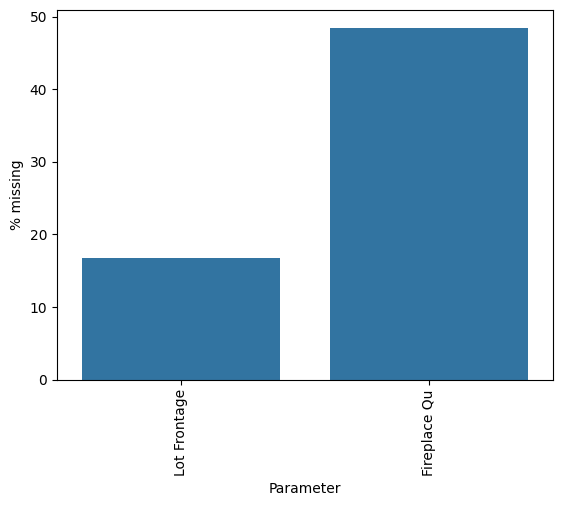

In [ ]:
# recalculate the missing values (%) by features
percent_nan = percent_missing(df)

# Bar plot of % of missing values
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.ylabel("% missing")
plt.xlabel('Parameter')
plt.xticks(rotation=90)
plt.show();

<h4>Filling in Fireplace Quality based with None based on the text description.</h4>

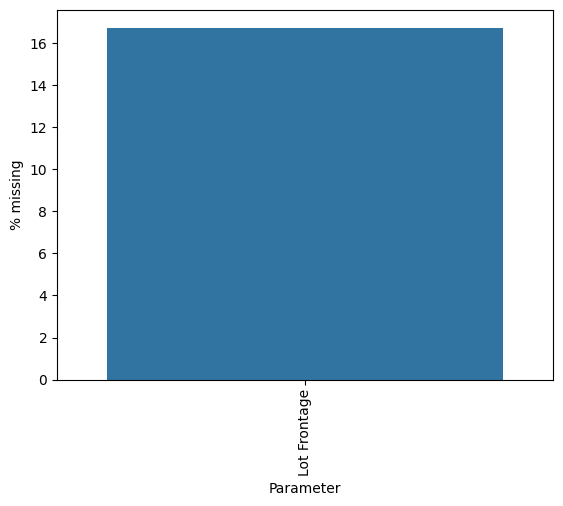

In [ ]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

# recalculate the missing values (%) by features
percent_nan = percent_missing(df)

# Bar plot of % of missing values
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.ylabel("% missing")
plt.xlabel('Parameter')
plt.xticks(rotation=90)
plt.show();

### [Imputation](https://en.wikipedia.org/wiki/Imputation_(statistics)) of Missing Data

To impute missing data, we need to decide what other filled in (no NaN values) feature most probably relates and is correlated with the missing feature data. In this particular case we will use:

  * **Neighborhood**: Physical locations within Ames city limits

  * **LotFrontage**: Linear feet of street connected to property

We can operate under the assumption that the Lot Frontage is relative to the neighborhood a house is in.

In [ ]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

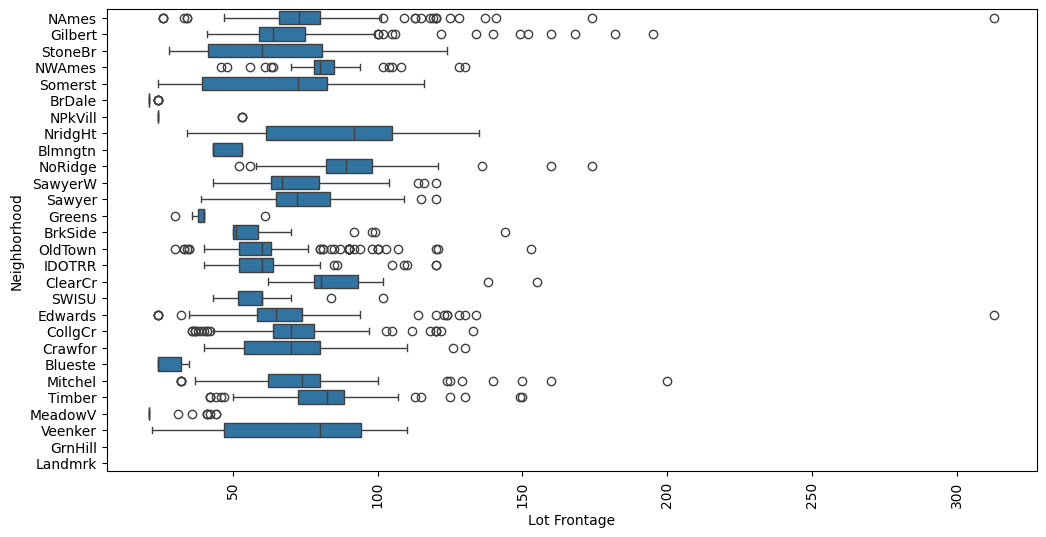

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='Neighborhood', x='Lot Frontage', data=df, orient='h')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    66.910112
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [ ]:
# Replace missing values with mean values of Lot Frontage by Neighbor
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [ ]:
# Neighbourhood with NO Lot Frontage (ie GrnHill and Landmrk) will be replaced with 0
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

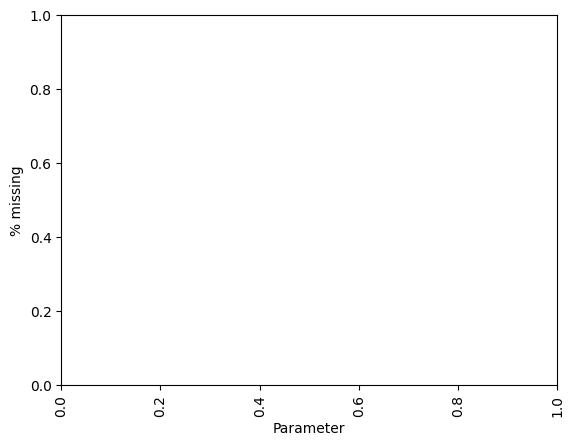

In [ ]:
# recalculate the missing values (%) by features
percent_nan = percent_missing(df)

# Bar plot of % of missing values
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.ylabel("% missing")
plt.xlabel('Parameter')
plt.xticks(rotation=90)
plt.show();

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2928 entries, 0 to 2929
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2928 non-null   int64  
 1   MS Zoning        2928 non-null   object 
 2   Lot Frontage     2928 non-null   float64
 3   Lot Area         2928 non-null   int64  
 4   Street           2928 non-null   object 
 5   Lot Shape        2928 non-null   object 
 6   Land Contour     2928 non-null   object 
 7   Utilities        2928 non-null   object 
 8   Lot Config       2928 non-null   object 
 9   Land Slope       2928 non-null   object 
 10  Neighborhood     2928 non-null   object 
 11  Condition 1      2928 non-null   object 
 12  Condition 2      2928 non-null   object 
 13  Bldg Type        2928 non-null   object 
 14  House Style      2928 non-null   object 
 15  Overall Qual     2928 non-null   int64  
 16  Overall Cond     2928 non-null   int64  
 17  Year Built       29

## Outliers

1. **Detection for Numerical Features**:

  * Z-score
  * IQR
  * Isolation Forest or One-Class SVM

2.

### Select Non-numeric columns

In [ ]:
obj_col = df.select_dtypes(include='object')
obj_col.head()

MS Zoning Street Lot Shape Land Contour Utilities Lot Config Land Slope  \
0        RL   Pave       IR1          Lvl    AllPub     Corner        Gtl   
1        RH   Pave       Reg          Lvl    AllPub     Inside        Gtl   
2        RL   Pave       IR1          Lvl    AllPub     Corner        Gtl   
3        RL   Pave       Reg          Lvl    AllPub     Corner        Gtl   
4        RL   Pave       IR1          Lvl    AllPub     Inside        Gtl   

  Neighborhood Condition 1 Condition 2  ... Kitchen Qual Functional  \
0        NAmes        Norm        Norm  ...           TA        Typ   
1        NAmes       Feedr        Norm  ...           TA        Typ   
2        NAmes        Norm        Norm  ...           Gd        Typ   
3        NAmes        Norm        Norm  ...           Ex        Typ   
4      Gilbert        Norm        Norm  ...           TA        Typ   

  Fireplace Qu Garage Type Garage Finish Garage Qual Garage Cond Paved Drive  \
0           Gd      Attchd           Fin          TA          TA           P   
1         None      Attchd           Unf          TA          TA           Y   
2         None      Attchd           Unf          TA          TA           Y   
3           TA      Attchd           Fin          TA          TA           Y   
4           TA      Attchd           Fin          TA          TA           Y   

  Sale Type Sale Condition  
0       WD          Normal  
1       WD          Normal  
2       WD          Normal  
3       WD          Normal  
4       WD          Normal  

[5 rows x 39 columns]

In [ ]:
len(obj_col.columns)

39

### Select Numeric columns

In [ ]:
# num_col = df.select_dtypes(exclude='object')
num_col = df.select_dtypes(include=np.number)
num_col.corr()['SalePrice'].sort_values()

Enclosed Porch    -0.128629
Kitchen AbvGr     -0.119857
Overall Cond      -0.101686
MS SubClass       -0.085031
Low Qual Fin SF   -0.037680
Bsmt Half Bath    -0.035864
Yr Sold           -0.030640
Misc Val          -0.015708
BsmtFin SF 2       0.005964
3Ssn Porch         0.032207
Mo Sold            0.035093
Pool Area          0.068394
Screen Porch       0.112105
Bedroom AbvGr      0.143952
Bsmt Unf SF        0.183233
Garage Yr Blt      0.253709
Lot Area           0.266537
2nd Flr SF         0.269685
Bsmt Full Bath     0.275742
Half Bath          0.285140
Open Porch SF      0.312882
Wood Deck SF       0.327259
Lot Frontage       0.348445
BsmtFin SF 1       0.433208
Fireplaces         0.474540
TotRms AbvGrd      0.495490
Mas Vnr Area       0.502161
Year Remod/Add     0.533295
Full Bath          0.545879
Year Built         0.558672
1st Flr SF         0.621711
Total Bsmt SF      0.632673
Garage Area        0.640397
Garage Cars        0.647908
Gr Liv Area        0.706927
Overall Qual       0.799306
SalePrice          1.000000
Name: SalePrice, dtype: float64

In [ ]:
len(num_col.columns)

37

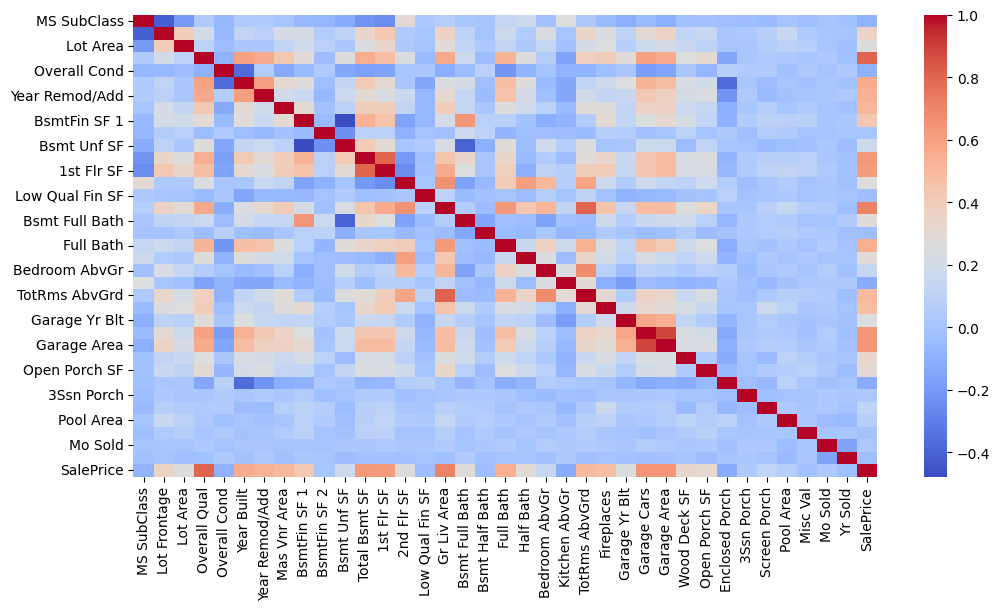

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(num_col.corr(), cmap='coolwarm')
plt.show();

<h4>if 2 features have high correlation, may consider removing. </h4>

### Outlier visualization

#### Data Distribution

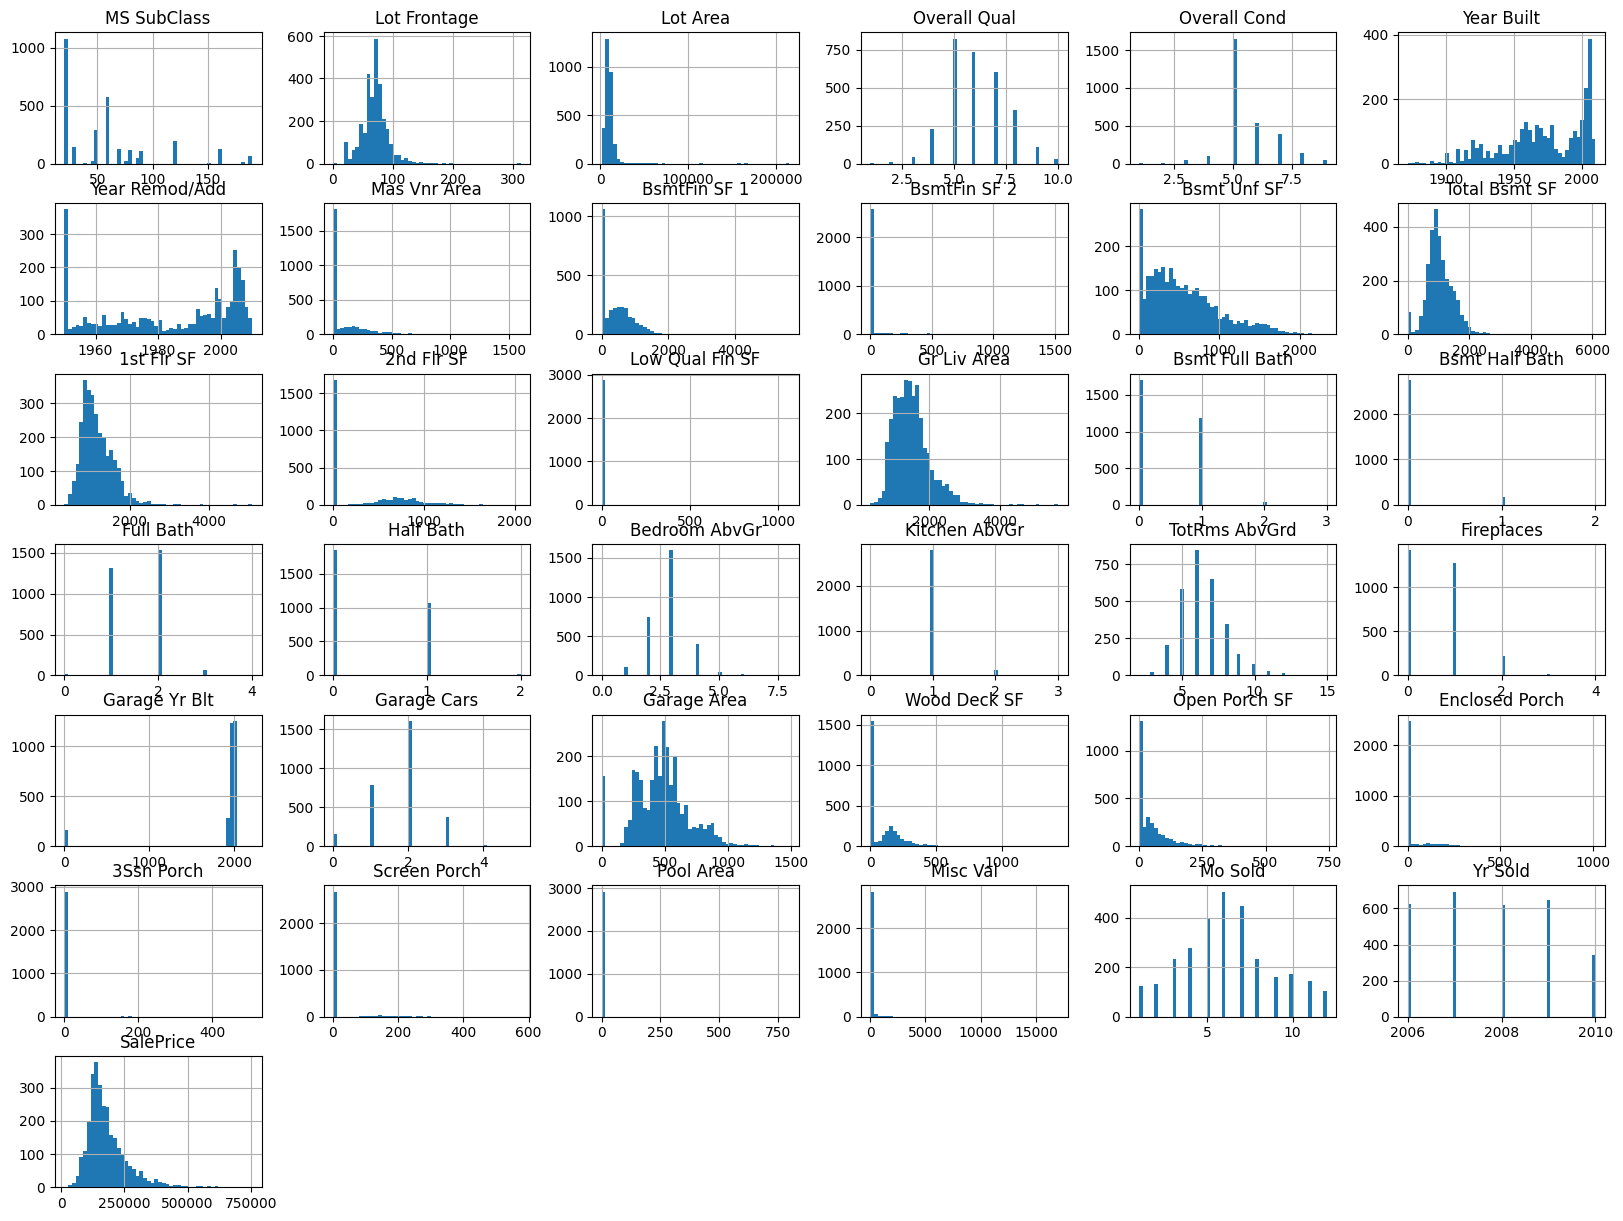

In [ ]:
plt.figure(figsize=(12,6))
df.hist(bins=50)
plt.show();

#### Boxplot

**Individual boxplots**

In [ ]:
# # Create boxplots for all numeric features in the dataset
# for column in df.columns:
#     plt.figure(figsize=(6, 4))
#     sns.boxplot(y=df[column]) # for horizontal plot, change y to x
#     plt.title(f'Boxplot of {column}')
#     plt.xlabel(column)
#     plt.show()

**Canvas boxplots**

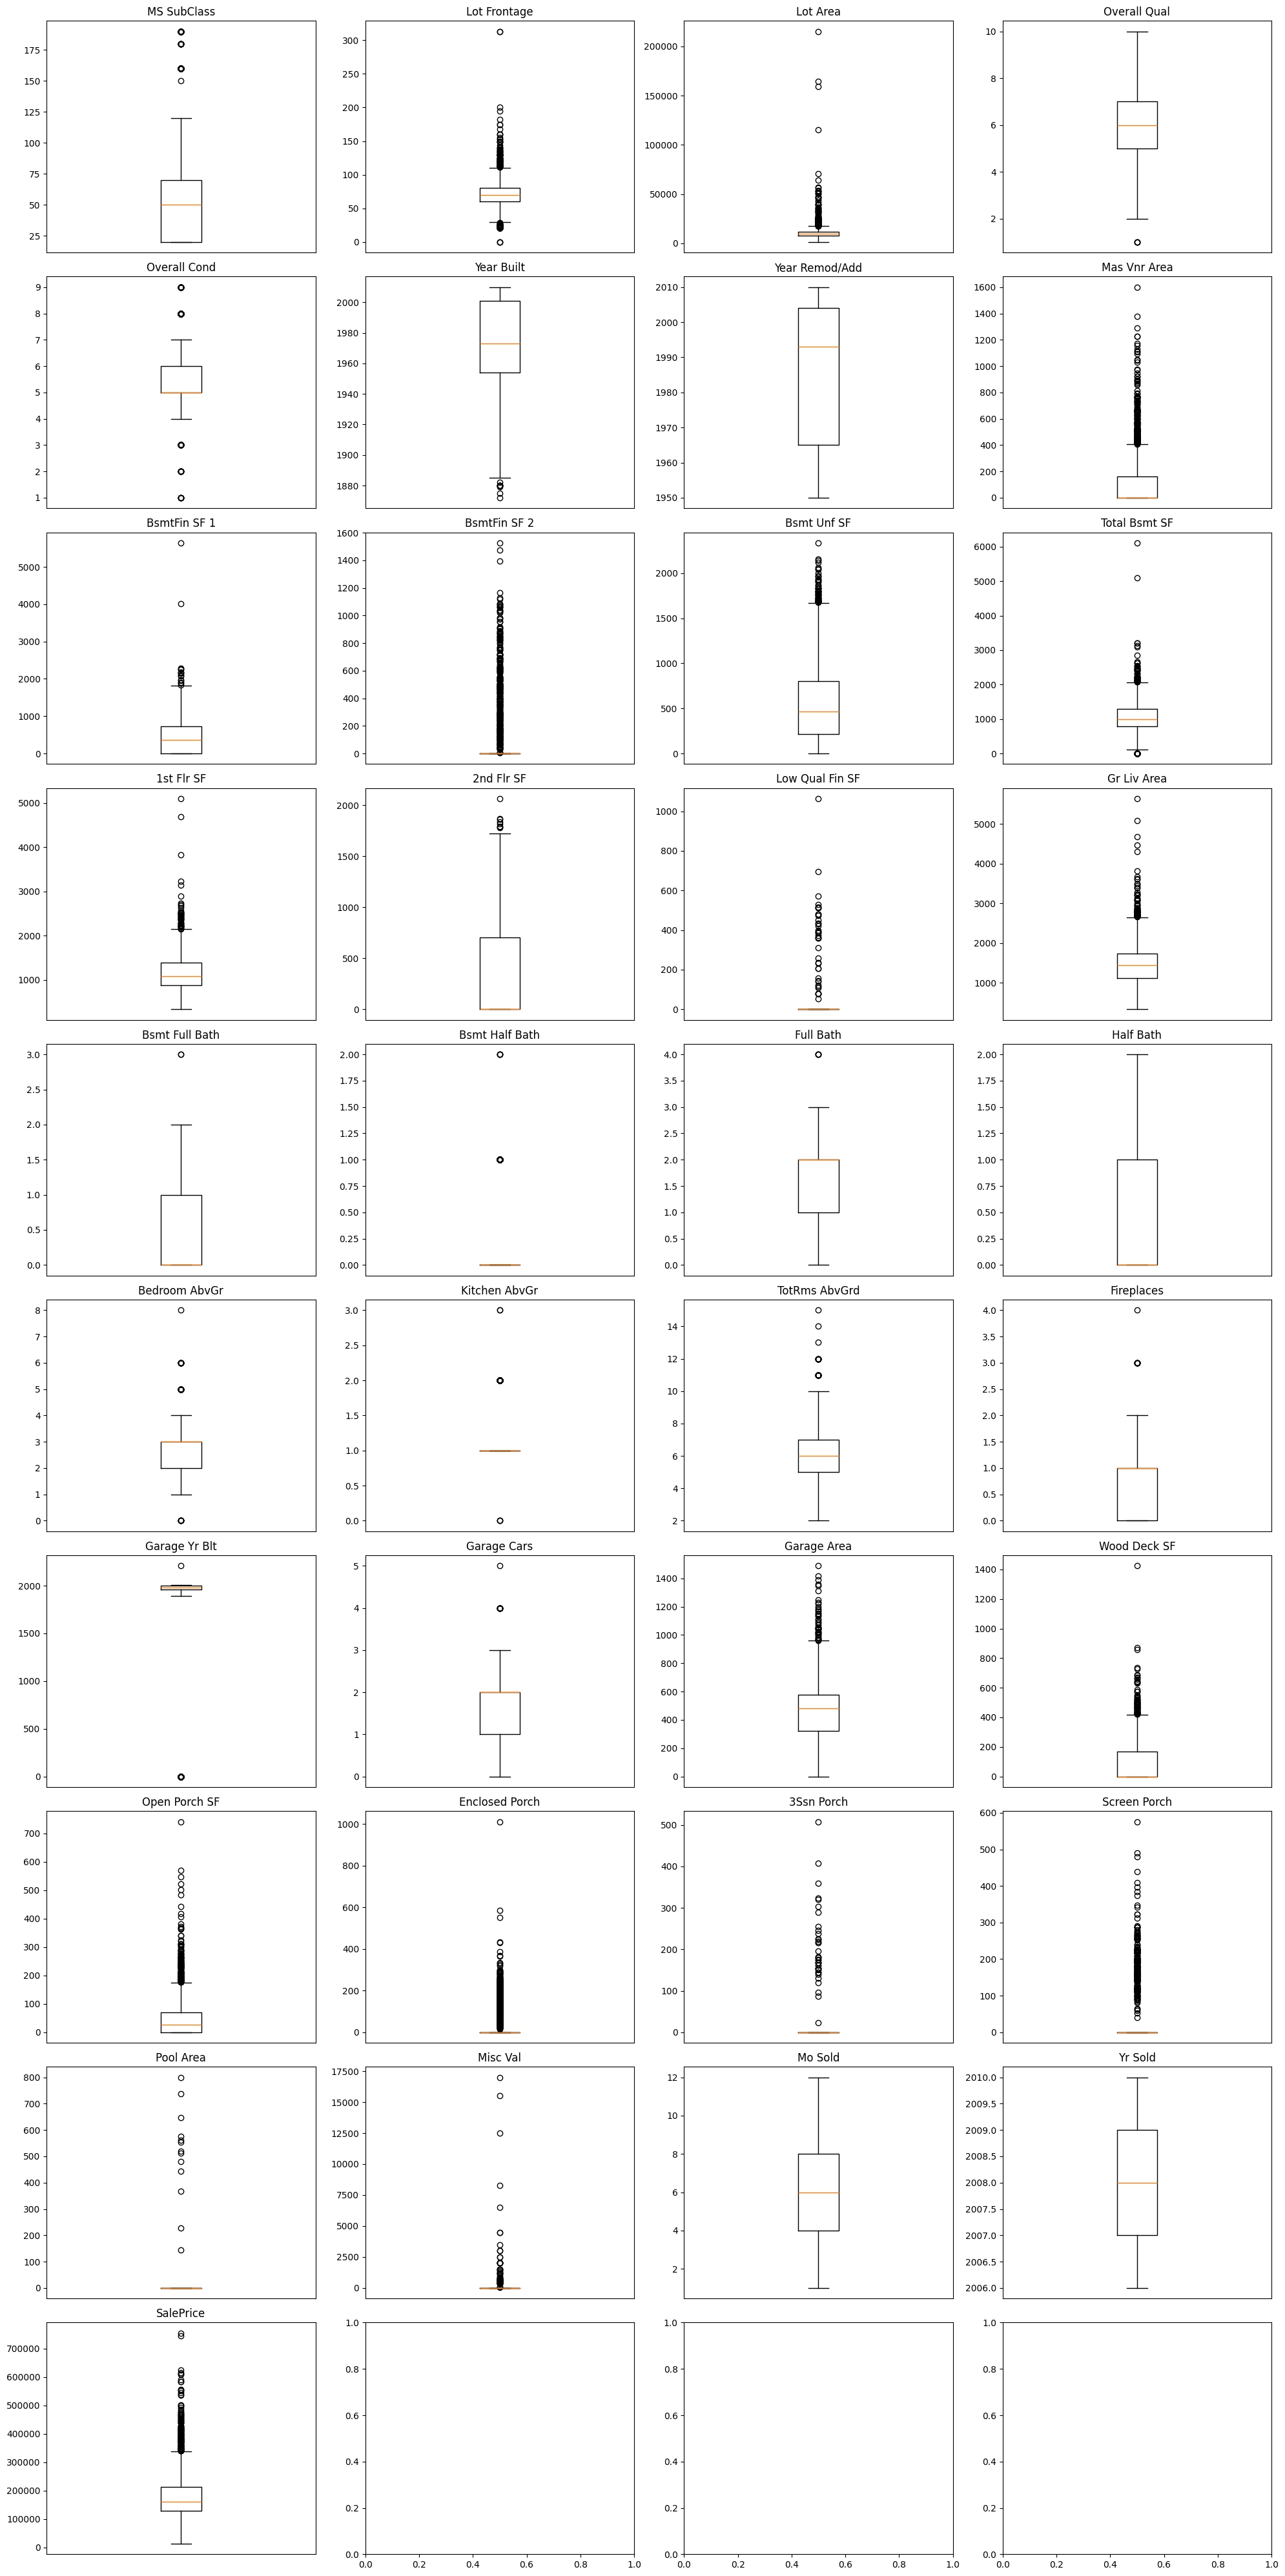

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_boxplots(data):
    data = data.select_dtypes(include='number')
    n_cols = 4  # Number of columns in the plot grid
    n_rows = len(data.columns) // n_cols + 1  # Calculate rows based on features
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
    for i, feature in enumerate(data.columns):
        ax = axes[i // n_cols, i % n_cols]
        ax.boxplot(data[feature].dropna())
        ax.set_title(feature)
        ax.set_xticks([])
    plt.tight_layout()
    plt.show()

# Example usage
plot_boxplots(df)


#### Pairwise Scatter Plot (Pair Plot)

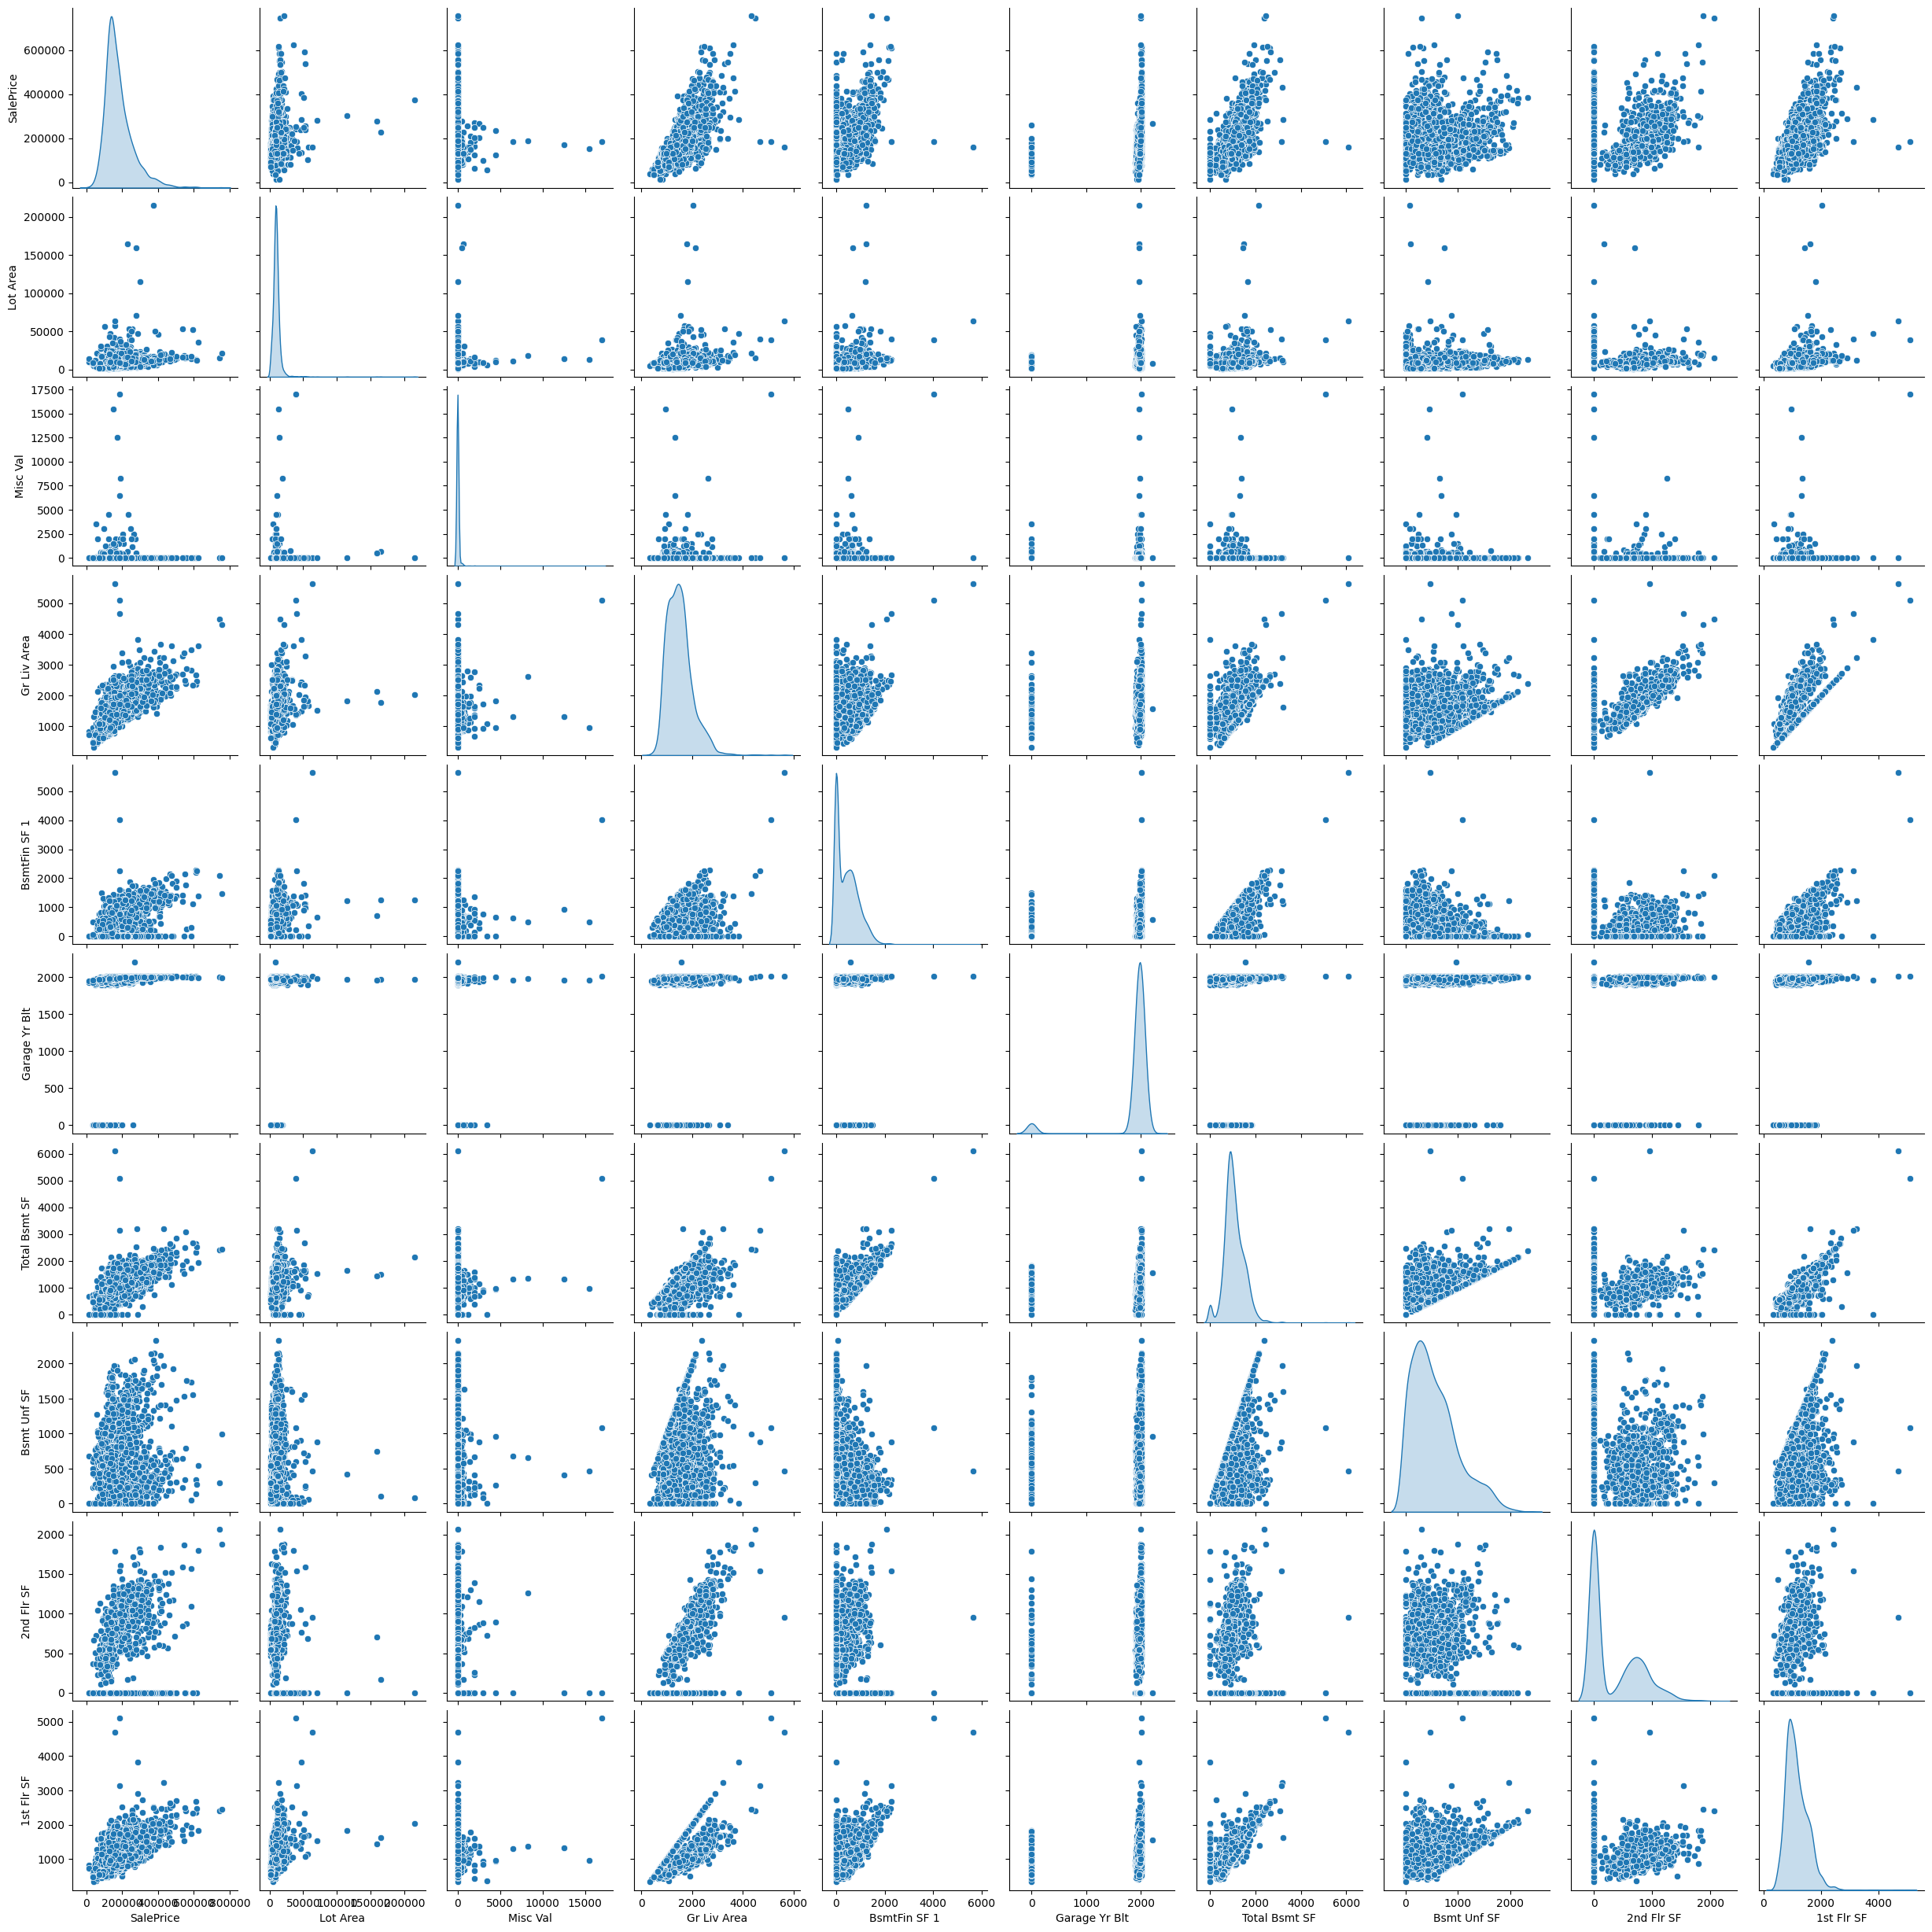

In [ ]:
import seaborn as sns

# Select top 10 features by variance or importance
top_features = num_col.var().nlargest(10).index
sns.pairplot(num_col[top_features], diag_kind='kde')
plt.show()


#### Bar charts (IQR outliers)

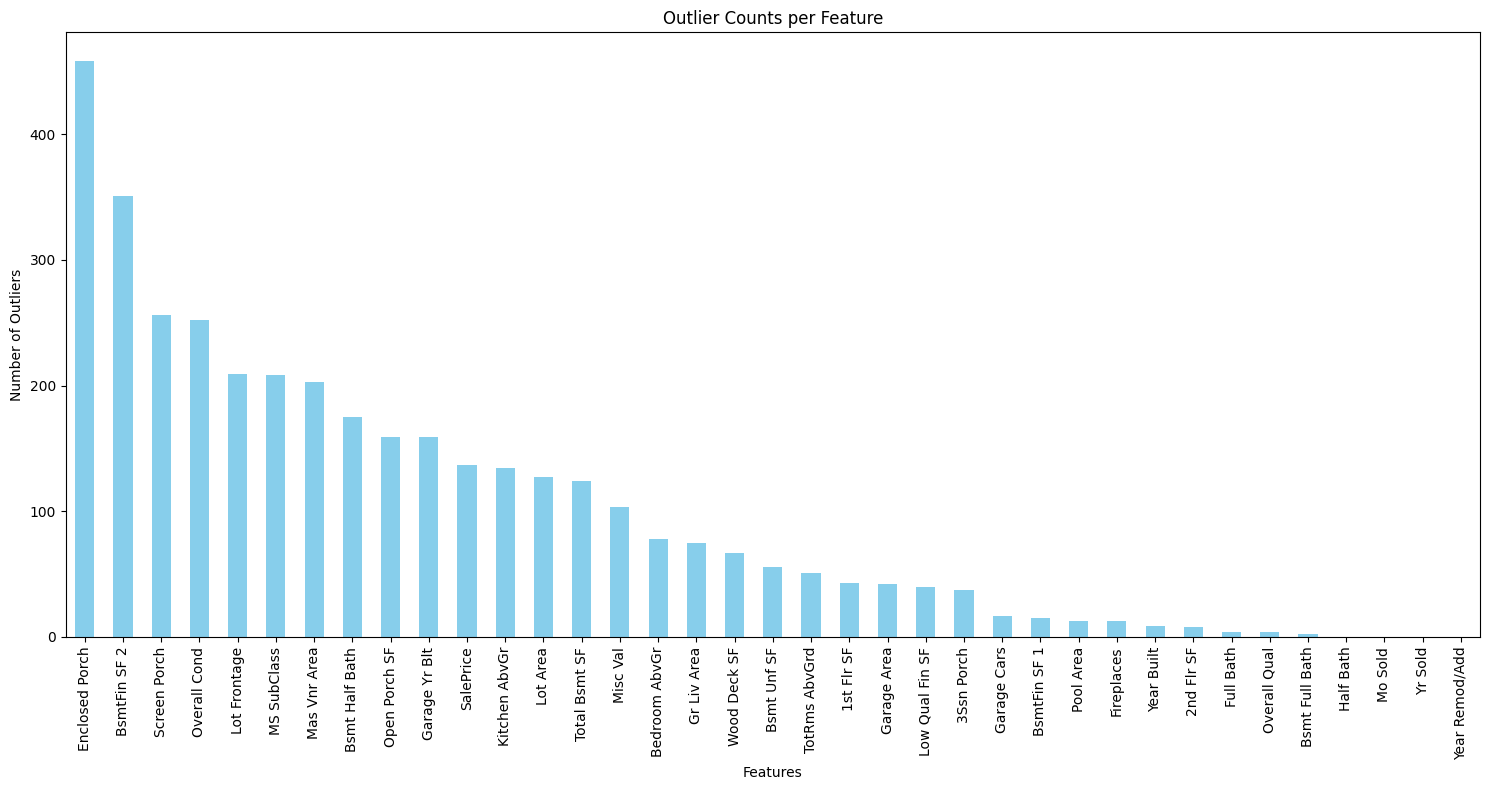

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_outlier_bar_chart(data):
    data = data.select_dtypes(include='number')
    outlier_counts = pd.Series(dtype=int)
    for feature in data.columns:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR))).sum()
        outlier_counts[feature] = outliers

    # Plot the bar chart
    plt.figure(figsize=(15, 8))
    outlier_counts.sort_values(ascending=False).plot(kind='bar', color='skyblue')
    plt.title('Outlier Counts per Feature')
    plt.xlabel('Features')
    plt.ylabel('Number of Outliers')
    plt.xticks(rotation=90)  # Rotate feature labels for better readability
    plt.tight_layout()
    plt.show()

# Example usage
plot_outlier_bar_chart(df)


#### Heatmap

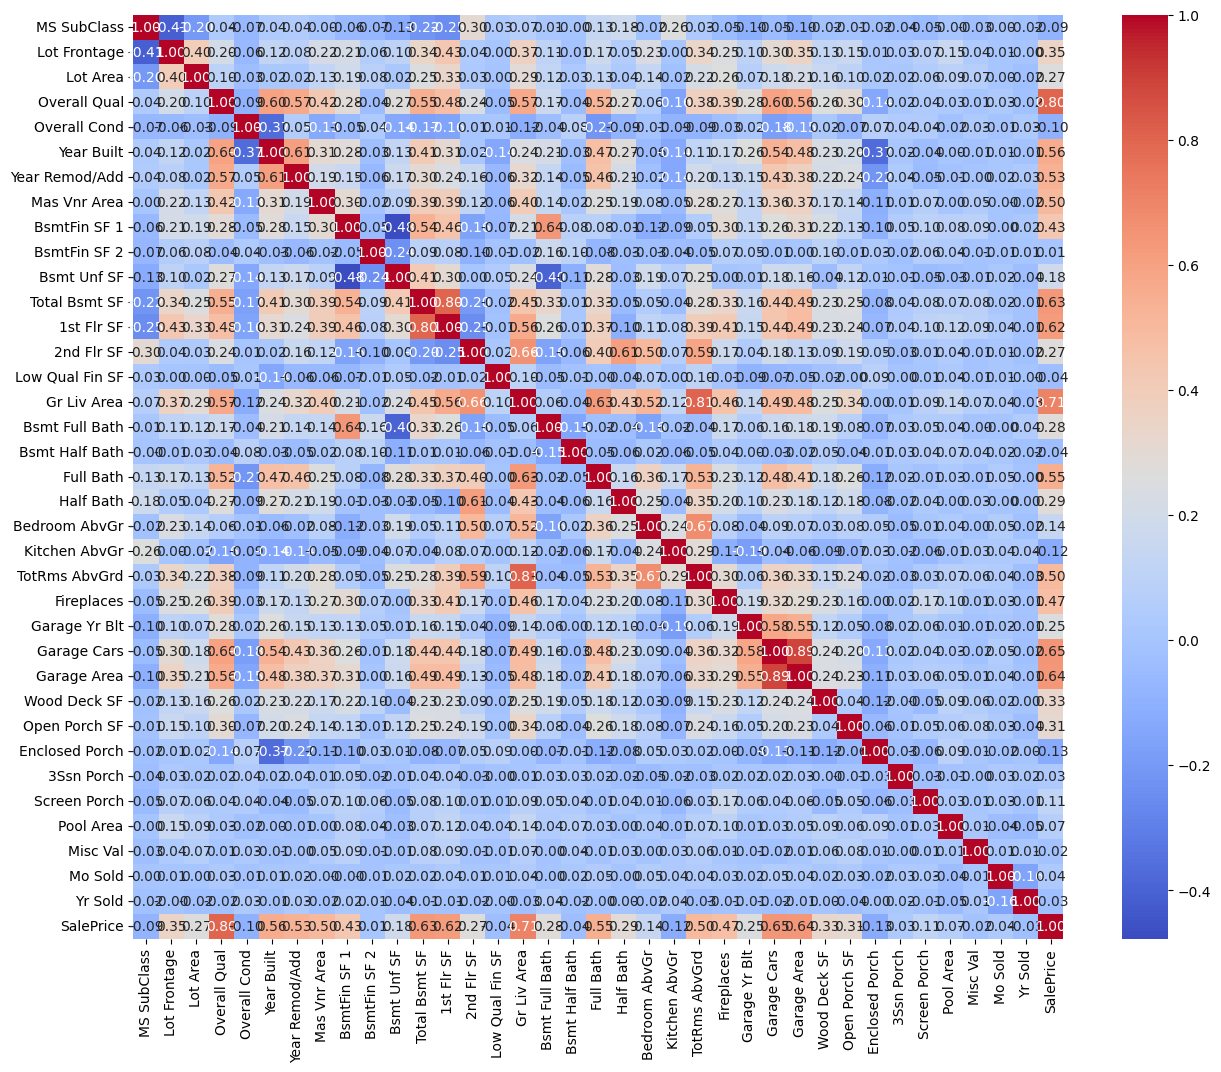

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(num_col.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

#### Target distribution plot

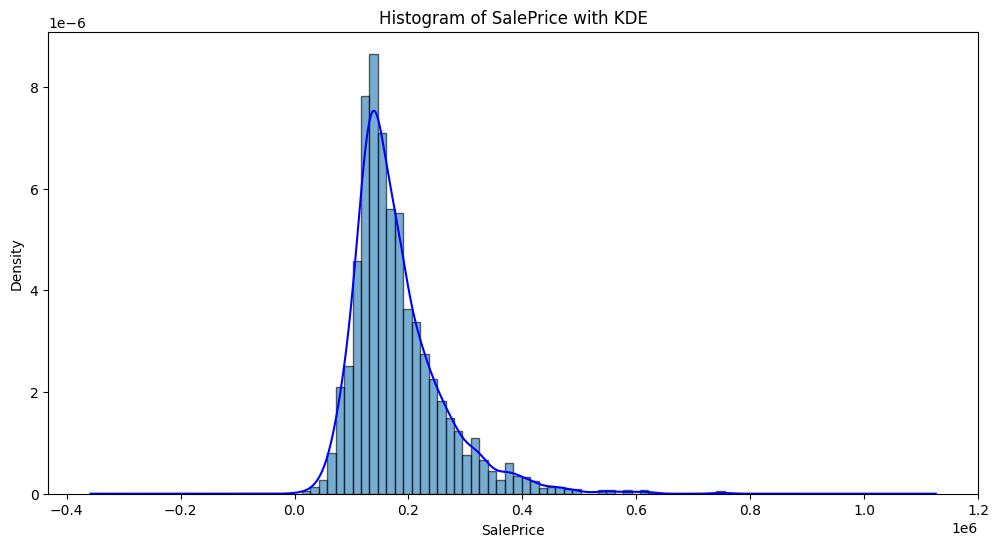

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(df['SalePrice'], bins=50, density=True, alpha=0.6, edgecolor='black')
df['SalePrice'].plot(kind='kde', color='blue')
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.title('Histogram of SalePrice with KDE')
plt.show()

#### Target vs Features

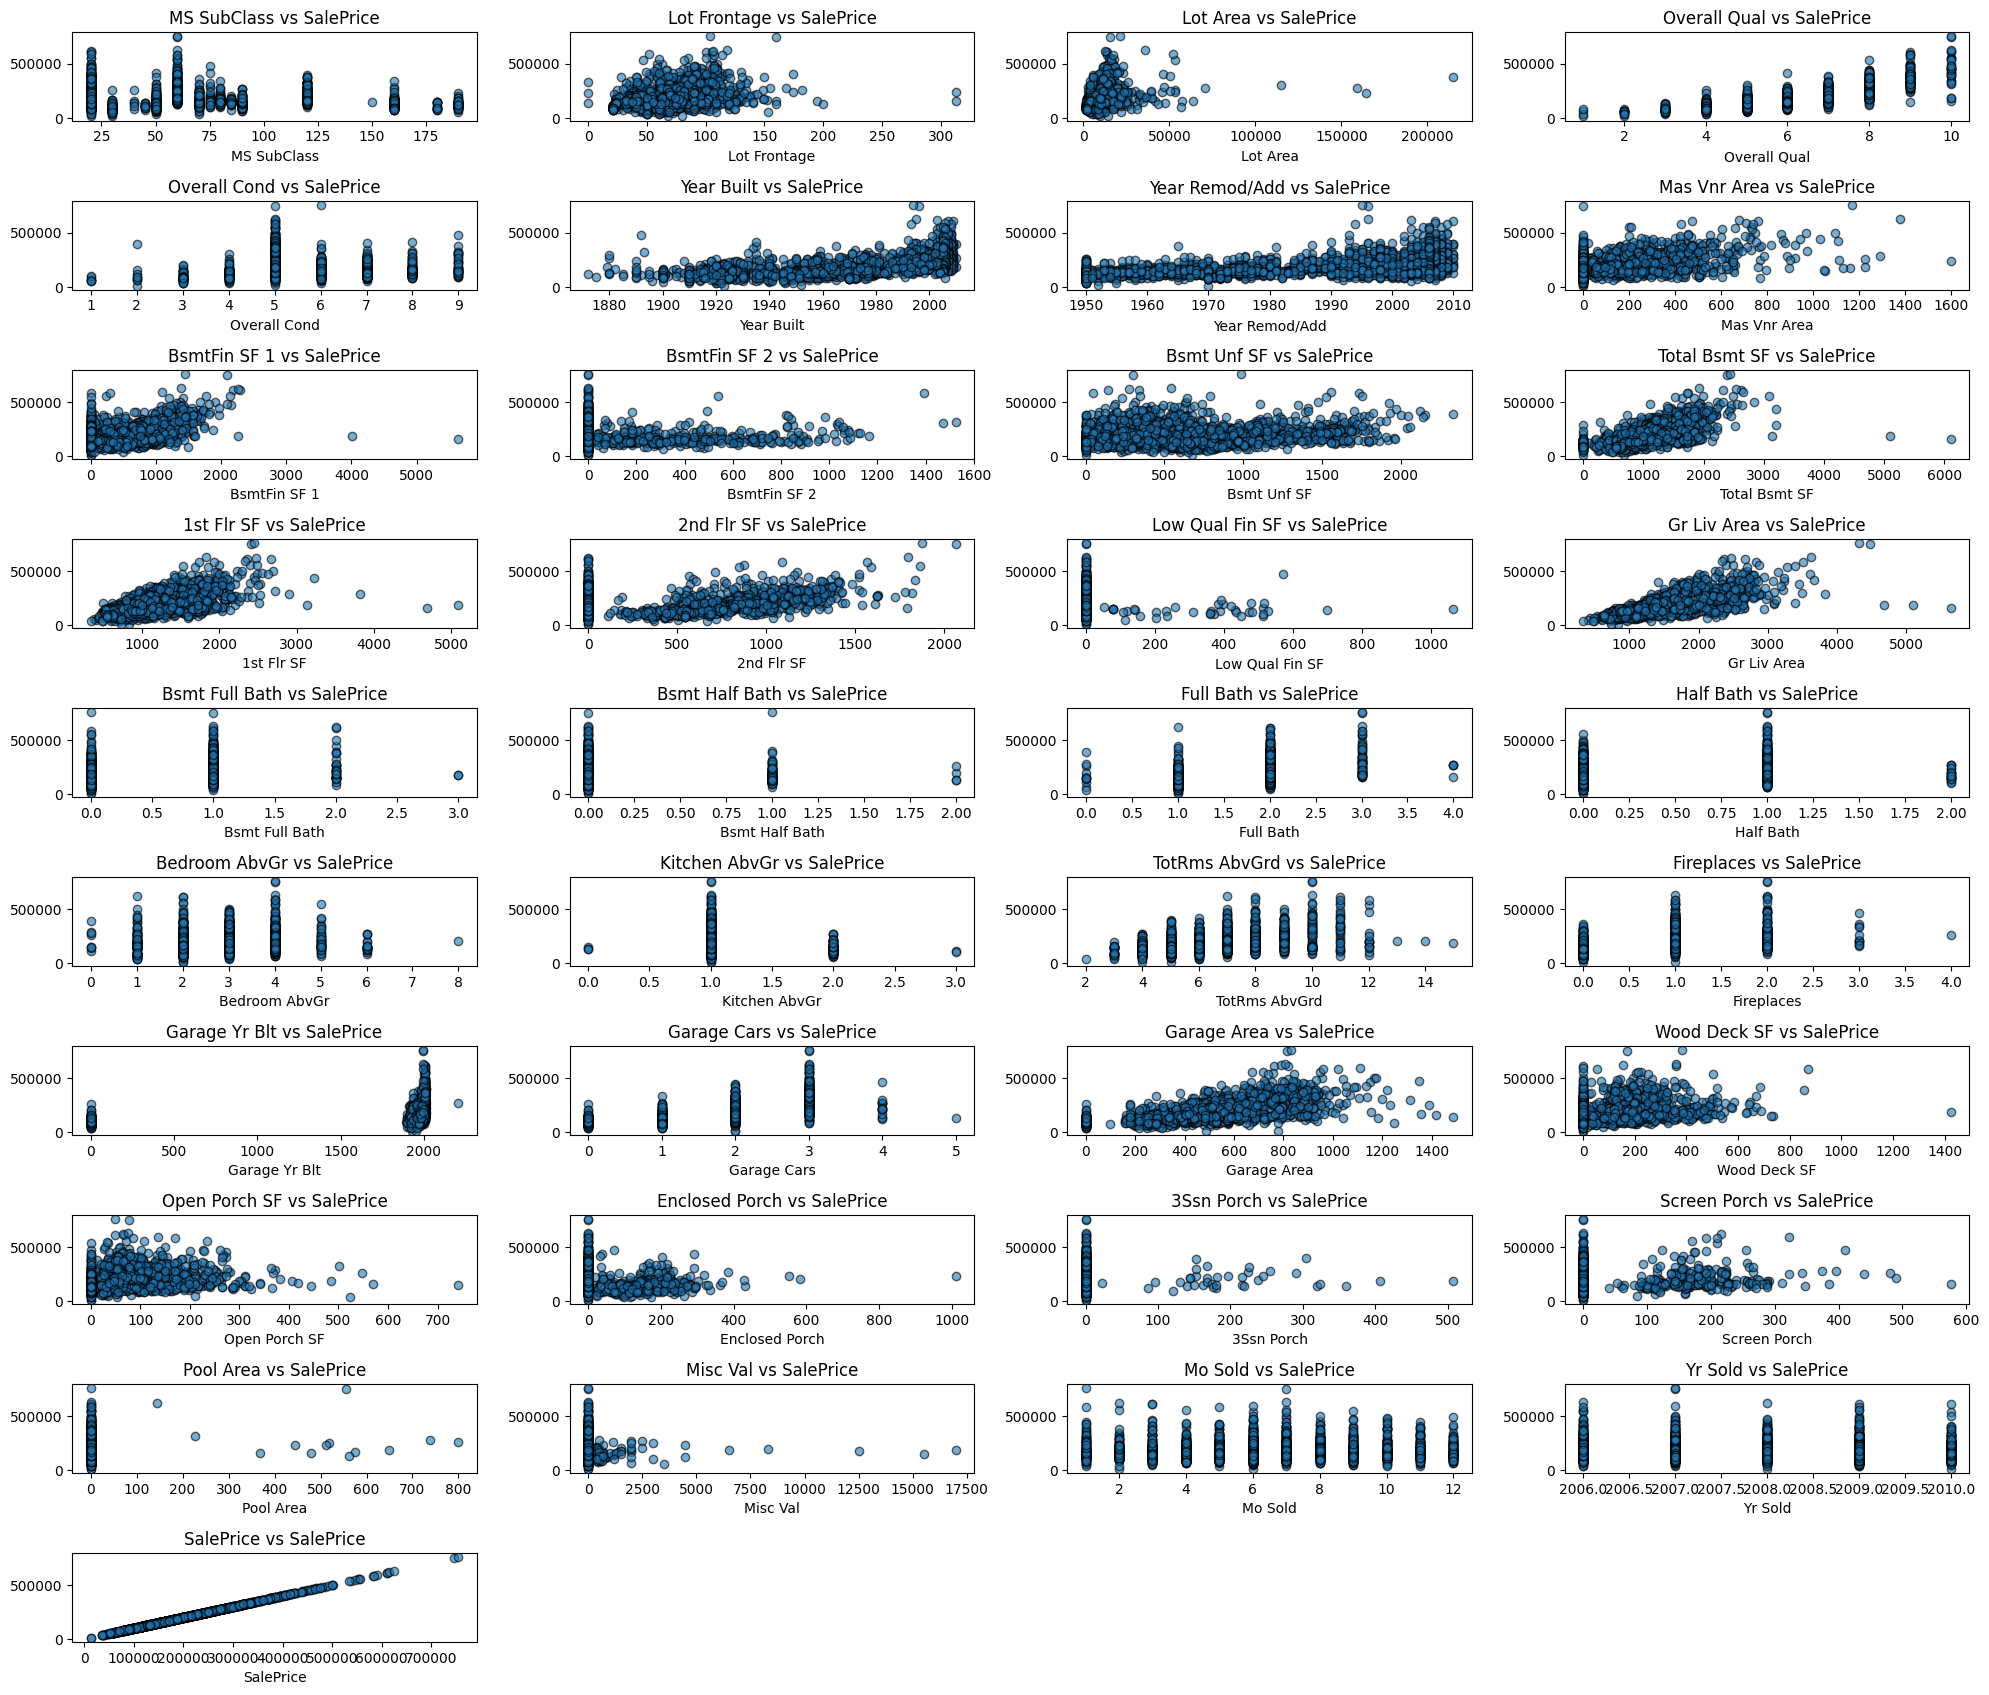

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with subplots for each feature
plt.figure(figsize=(20, 20))
for i, feature in enumerate(num_col, 1):
    plt.subplot(12, 4, i)  # Adjust rows and columns based on the number of features
    plt.scatter(df[feature], df['SalePrice'], alpha=0.6, edgecolor='k')
    plt.title(f"{feature} vs SalePrice")
    plt.xlabel(feature)
    # plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()


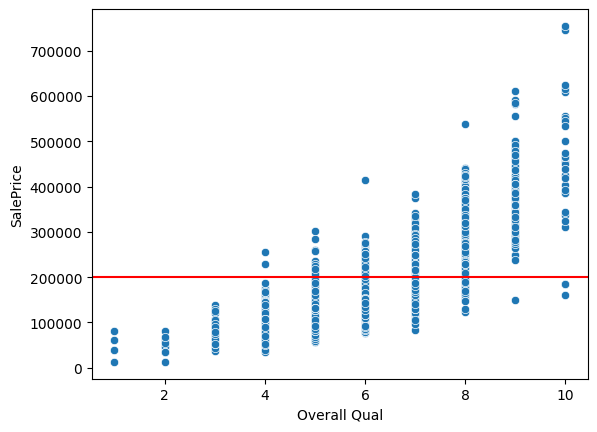

In [ ]:
  sns.scatterplot(x='Overall Qual', y='SalePrice',data=df)
  plt.axhline(y=200000, color='r', linestyle='-')

<h4>There is outliers for overall quality rating of 10 but selling below 200k.</h4>

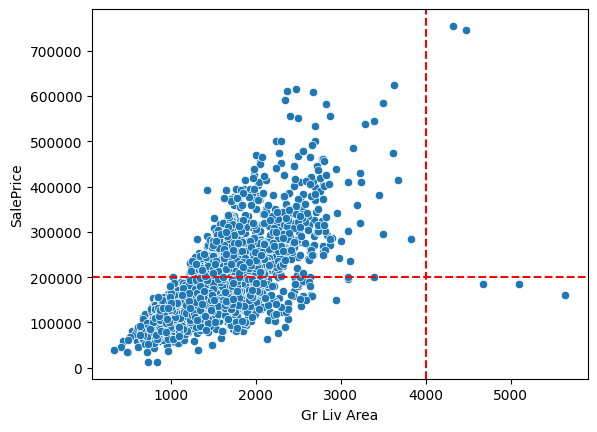

In [ ]:
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice')
plt.axhline(y=200000, color='r', linestyle='--')
plt.axvline(x=4000, color='r', linestyle='--')

<h4></h4>

### Remove outliers

In [ ]:
# Filter condition and return index. Remove from dataframe.
ind_drop = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

In [ ]:
df = df.drop(ind_drop,axis=0)

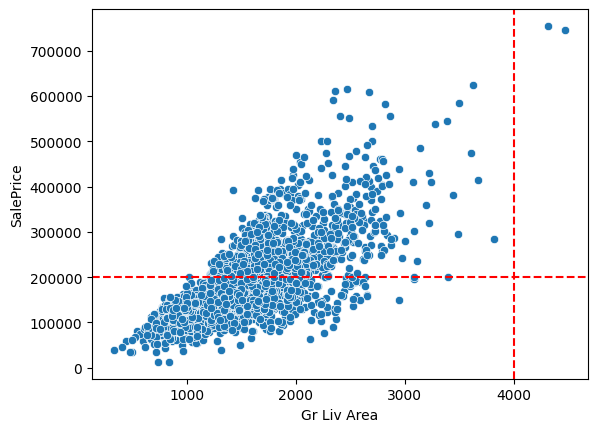

In [ ]:
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice')
plt.axhline(y=200000, color='r', linestyle='--')
plt.axvline(x=4000, color='r', linestyle='--')

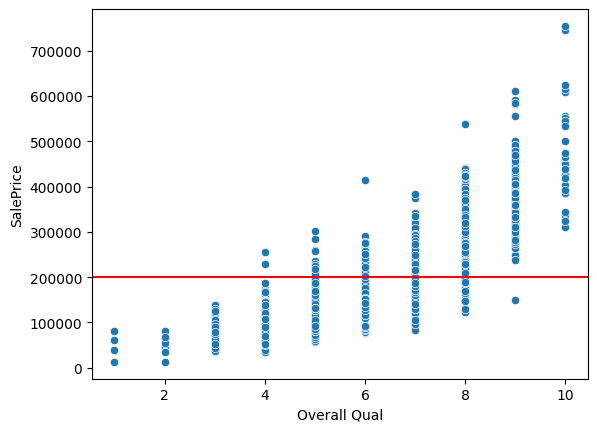

In [ ]:
  sns.scatterplot(x='Overall Qual', y='SalePrice',data=df)
  plt.axhline(y=200000, color='r', linestyle='-')

## Categorial Data

In [ ]:
obj_col.head()

MS Zoning Street Lot Shape Land Contour Utilities Lot Config Land Slope  \
0        RL   Pave       IR1          Lvl    AllPub     Corner        Gtl   
1        RH   Pave       Reg          Lvl    AllPub     Inside        Gtl   
2        RL   Pave       IR1          Lvl    AllPub     Corner        Gtl   
3        RL   Pave       Reg          Lvl    AllPub     Corner        Gtl   
4        RL   Pave       IR1          Lvl    AllPub     Inside        Gtl   

  Neighborhood Condition 1 Condition 2  ... Kitchen Qual Functional  \
0        NAmes        Norm        Norm  ...           TA        Typ   
1        NAmes       Feedr        Norm  ...           TA        Typ   
2        NAmes        Norm        Norm  ...           Gd        Typ   
3        NAmes        Norm        Norm  ...           Ex        Typ   
4      Gilbert        Norm        Norm  ...           TA        Typ   

  Fireplace Qu Garage Type Garage Finish Garage Qual Garage Cond Paved Drive  \
0           Gd      Attchd           Fin          TA          TA           P   
1         None      Attchd           Unf          TA          TA           Y   
2         None      Attchd           Unf          TA          TA           Y   
3           TA      Attchd           Fin          TA          TA           Y   
4           TA      Attchd           Fin          TA          TA           Y   

  Sale Type Sale Condition  
0       WD          Normal  
1       WD          Normal  
2       WD          Normal  
3       WD          Normal  
4       WD          Normal  

[5 rows x 39 columns]

### Visualization

In [ ]:
# obj_col_names = [i for i in obj_col.columns]
# plt.figure(figsize=(30,30))

# for i, col in enumerate(obj_col_names,1):
#   plt.subplot(15, 3, i)
#   df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
#   plt.xlabel(col)
#   plt.ylabel('Frequency')
#   plt.title(f'Distribution of {col}')
#   plt.xticks(rotation=45)

# # plt.tight_layout()
# plt.show()

### Ordinal Categorical variables

In [ ]:
df2 = df.copy()

df2['MS SubClass'] = df2['MS SubClass'].astype(str) # This is number code per class instead of numeric measurement

df2_obj = df2.select_dtypes(include='object')
df2_num = df2.select_dtypes(exclude='object')

In [ ]:
ordinal_col1 = ['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond',]
ordinal_col2 = ['Bsmt Exposure',]
ordinal_col3 = ['BsmtFin Type 1','BsmtFin Type 2',]
quality_mapping1 = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0}
quality_mapping2 = {'Gd':4,'Av':3,'Mn':2,'No':1,'None':0}
quality_mapping3 = {'GLQ':6,'ALQ':5,'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0,}

df2_obj[ordinal_col1] = df2_obj[ordinal_col1].replace(quality_mapping1).infer_objects(copy=False)
df2_obj[ordinal_col2] = df2_obj[ordinal_col2].replace(quality_mapping2)
df2_obj[ordinal_col3] = df2_obj[ordinal_col3].replace(quality_mapping3)

<ipython-input-60-8e18c188f27f>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2_obj[ordinal_col1] = df2_obj[ordinal_col1].replace(quality_mapping1).infer_objects(copy=False)
<ipython-input-60-8e18c188f27f>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2_obj[ordinal_col2] = df2_obj[ordinal_col2].replace(quality_mapping2)
<ipython-input-60-8e18c188f27f>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_object

In [ ]:
df2_obj.head()

MS SubClass MS Zoning Street Lot Shape Land Contour Utilities Lot Config  \
0          20        RL   Pave       IR1          Lvl    AllPub     Corner   
1          20        RH   Pave       Reg          Lvl    AllPub     Inside   
2          20        RL   Pave       IR1          Lvl    AllPub     Corner   
3          20        RL   Pave       Reg          Lvl    AllPub     Corner   
4          60        RL   Pave       IR1          Lvl    AllPub     Inside   

  Land Slope Neighborhood Condition 1  ... Kitchen Qual Functional  \
0        Gtl        NAmes        Norm  ...            3        Typ   
1        Gtl        NAmes       Feedr  ...            3        Typ   
2        Gtl        NAmes        Norm  ...            4        Typ   
3        Gtl        NAmes        Norm  ...            5        Typ   
4        Gtl      Gilbert        Norm  ...            3        Typ   

  Fireplace Qu Garage Type Garage Finish Garage Qual Garage Cond Paved Drive  \
0            4      Attchd           Fin           3           3           P   
1            0      Attchd           Unf           3           3           Y   
2            0      Attchd           Unf           3           3           Y   
3            3      Attchd           Fin           3           3           Y   
4            3      Attchd           Fin           3           3           Y   

   Sale Type  Sale Condition  
0        WD           Normal  
1        WD           Normal  
2        WD           Normal  
3        WD           Normal  
4        WD           Normal  

[5 rows x 40 columns]

### Nominal Categorical variables

1. **get_dummy**: when working with pandas

2. **OneHotEncoder (without ColumnTransformer)**:
  * Use when preprocessing data specifically for use within a scikit-learn pipeline.
  * Use it when you need categorical encoding for one or more columns, and where those columns are already pre-selected for encoding.

3. **OneHotEncoder (with ColumnTransformer)**:
  * when you need to apply transformations to specific columns within a dataset containing mixed data types (e.g., categorical and numerical data).
  * It’s especially useful in a pipeline setup and allows you to combine transformations, making it suitable for preprocessing in a way that keeps your code modular and prevents data leakage.



In [ ]:
df2_obj = pd.get_dummies(df2_obj, drop_first=True) # to avoid multicollinearity

### Merge num & non-num

In [ ]:
df2 = pd.concat([df2_num, df2_obj], axis=1)
df2.head()

Lot Frontage  Lot Area  Overall Qual  Overall Cond  Year Built  \
0         141.0     31770             6             5        1960   
1          80.0     11622             5             6        1961   
2          81.0     14267             6             6        1958   
3          93.0     11160             7             5        1968   
4          74.0     13830             5             5        1997   

   Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  ...  \
0            1960         112.0         639.0           0.0        441.0  ...   
1            1961           0.0         468.0         144.0        270.0  ...   
2            1958         108.0         923.0           0.0        406.0  ...   
3            1968           0.0        1065.0           0.0       1045.0  ...   
4            1998           0.0         791.0           0.0        137.0  ...   

   Sale Type_ConLw  Sale Type_New  Sale Type_Oth  Sale Type_VWD  \
0            False          False          False          False   
1            False          False          False          False   
2            False          False          False          False   
3            False          False          False          False   
4            False          False          False          False   

   Sale Type_WD   Sale Condition_AdjLand  Sale Condition_Alloca  \
0           True                   False                  False   
1           True                   False                  False   
2           True                   False                  False   
3           True                   False                  False   
4           True                   False                  False   

   Sale Condition_Family  Sale Condition_Normal  Sale Condition_Partial  
0                  False                   True                   False  
1                  False                   True                   False  
2                  False                   True                   False  
3                  False                   True                   False  
4                  False                   True                   False  

[5 rows x 230 columns]

In [ ]:
df3 = df.copy()
df3['MS SubClass'] = df3['MS SubClass'].astype(str) # This is number code per class instead of numeric measurement.
df3_obj = df3.select_dtypes(include='object')
df3_num = df3.select_dtypes(exclude='object')
df3_obj = pd.get_dummies(df3_obj, drop_first=True) # to avoid multicollinearity
df3 = pd.concat([df3_num, df3_obj], axis=1)
df3.head()

Lot Frontage  Lot Area  Overall Qual  Overall Cond  Year Built  \
0         141.0     31770             6             5        1960   
1          80.0     11622             5             6        1961   
2          81.0     14267             6             6        1958   
3          93.0     11160             7             5        1968   
4          74.0     13830             5             5        1997   

   Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  ...  \
0            1960         112.0         639.0           0.0        441.0  ...   
1            1961           0.0         468.0         144.0        270.0  ...   
2            1958         108.0         923.0           0.0        406.0  ...   
3            1968           0.0        1065.0           0.0       1045.0  ...   
4            1998           0.0         791.0           0.0        137.0  ...   

   Sale Type_ConLw  Sale Type_New  Sale Type_Oth  Sale Type_VWD  \
0            False          False          False          False   
1            False          False          False          False   
2            False          False          False          False   
3            False          False          False          False   
4            False          False          False          False   

   Sale Type_WD   Sale Condition_AdjLand  Sale Condition_Alloca  \
0           True                   False                  False   
1           True                   False                  False   
2           True                   False                  False   
3           True                   False                  False   
4           True                   False                  False   

   Sale Condition_Family  Sale Condition_Normal  Sale Condition_Partial  
0                  False                   True                   False  
1                  False                   True                   False  
2                  False                   True                   False  
3                  False                   True                   False  
4                  False                   True                   False  

[5 rows x 274 columns]

## IMPORTANT NOTE

There are two sets of data:

* DF2 with oridinal, nominal and numeric features.
* DF3 w nominal and numeric features.


# Linear Models

## Linear Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Split dataset into X features and y target labels
X = df3.drop('SalePrice', axis=1)
y = df3['SalePrice']

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

# Standardize features
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Train the Linear Regression model
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)
# linear.fit(X_train, y_train)

# Predict the target on the test set
y_pred_linear = linear.predict(X_test_scaled)
# y_pred_linear = linear.predict(X_test)

# Evaluate model
print(f'MAE: {mean_absolute_error(y_test,y_pred_linear):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_linear)):.2f}')
print(f'R2 Score: {r2_score(y_test, y_pred_linear):.2f}')
print(f'Average sales: {np.mean(df3["SalePrice"]):.2f}')

MAE: 14585.95
RMSE: 20858.18
R2 Score: 0.92
Average sales: 180815.54


## ElasticNet+ GridSearchCV

Computational extensive.

In [ ]:
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import ElasticNet
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# # Split dataset into X features and y target labels
# X = df.drop('SalePrice', axis=1)
# y = df['SalePrice']

# # Split dataset into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

# # Standardize features
# sc = StandardScaler()
# X_train_scaled = sc.fit_transform(X_train)
# X_test_scaled = sc.transform(X_test)

# # Model setup
# elastic = ElasticNet(max_iter=50000)
# param_grid = {'alpha':[0.1,1,5,10,50,100],
#               'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

# grid_elastic = GridSearchCV(estimator=elastic,
#                            param_grid=param_grid,
#                            scoring='neg_mean_squared_error',
#                            cv=5,
#                            verbose=1) # verbose number a personal preference

# # Train model
# grid_elastic.fit(X_train_scaled,y_train)

# # Best parameters from GridSearchCV
# print("Best Parameters:", grid_elastic.best_params_)

# Use the best estimator for predictions
# best_elastic = grid_elastic.best_estimator_

# # Evaluate Mode
# y_pred_g_elastic = best_elastic.predict(X_test_scaled)

# print(f'MAE: {mean_absolute_error(y_test,y_pred_g_elastic):.2f}')
# print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_g_elastic)):.2f}')
# print(f'R2 Score: {r2_score(y_test, y_pred_g_elastic):.2f}')
# print(f'Average sales: {np.mean(df3["SalePrice"]):.2f}')
# print(f'Best parameter: {grid_elastic.best_params_}')
# print(f'Best estimator: {grid_elastic.best_estimator_}')

## [ElasticNetCV()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Split dataset into X features and y target labels
X = df3.drop('SalePrice', axis=1)
y = df3['SalePrice']

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

# Standardize features
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Model setup
elastic_cv = ElasticNetCV(alphas=[0.1,1,5,10,50,100],
                                l1_ratio=[.1, .5, .7, .9, .95, .99, 1],
                                max_iter=50000,
                                cv=5)

# Train model
elastic_cv.fit(X_train_scaled, y_train)

# Evaluate Model
y_pred_elastic_cv = elastic_cv.predict(X_test_scaled)

print(f'Best alpha: {elastic_cv.alpha_}')
print(f'Best l1_ratio: {elastic_cv.l1_ratio_}')
print(f'MAE: {mean_absolute_error(y_test,y_pred_elastic_cv):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_elastic_cv)):.2f}')
print(f'R2 Score: {r2_score(y_test, y_pred_elastic_cv):.2f}')
print(f'Average sales: {np.mean(df3["SalePrice"]):.2f}')

Best alpha: 100.0
Best l1_ratio: 1.0
MAE: 14195.54
RMSE: 20558.18
R2 Score: 0.92
Average sales: 180815.54


In [ ]:
# Refined parameter grid for ElasticNet
elastic_cv2 = ElasticNetCV(alphas=[120, 130, 140, 150, 160, 170, 180],
                                l1_ratio=[.7,.75,.8,.85, .9, .95, .99, 1],
                                max_iter=50000,
                                cv=5)

# Train model
elastic_cv2.fit(X_train_scaled, y_train)

# Evaluate model
y_pred_elastic_cv2 = elastic_cv2.predict(X_test_scaled)

print(f'Best alpha: {elastic_cv2.alpha_}')
print(f'Best l1_ratio: {elastic_cv2.l1_ratio_}')
print(f'MAE: {mean_absolute_error(y_test,y_pred_elastic_cv2)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_elastic_cv2))}')
print(f'R2 Score: {r2_score(y_test, y_pred_elastic_cv2):.2f}')
print(f'Average sales: {np.mean(df3["SalePrice"]):.2f}')

Best alpha: 120
Best l1_ratio: 1.0
MAE: 14186.633899624421
RMSE: 20557.859792911513
R2 Score: 0.92
Average sales: 180815.54


# Non-Linear Models

## [Support Vector Regression](https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVR.html)

When working with high dimensional dataset, SVR can struggle with performance and and interpretability, especially if many features are redundant or irrelevant.

In [ ]:
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVR
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# # Split dataset into X features and y target labels
# X = df3.drop('SalePrice', axis=1)
# y = df3['SalePrice']

# # Split dataset into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

# # Standardize features
# scX = StandardScaler()
# X_train_scaled = scX.fit_transform(X_train)
# X_test_scaled = sc.transform(X_test)

# scY = StandardScaler()
# y_train_scaled = scY.fit_transform(y_train.values.reshape(-1,1)).ravel() # ravel to flatten
# y_test_scaled = scY.transform(y_test.values.reshape(-1,1)).ravel()

# # Parameter setup
# svr = SVR()

# param_grid = {'C': [0.001, 0.01,0.1, 0.5, 1, 10, 100],
#               'gamma': ['scale','auto', 0.1, 0.01, 0.001],
#               'kernel':['linear','poly','rbf'],
#               'degree':[2,3,4],
#               'epsilon':[0,0.01,0.1,0.5,1,2]}

# grid_svr = GridSearchCV(estimator=svr,
#                          param_grid=param_grid,
#                          scoring='neg_mean_squared_error',
#                          cv=5,
#                          verbose=1)

# # Train model
# grid_svr.fit(X_train_scaled, y_train_scaled)

# # Evaluate model
# print(f'Best: Parameter: {grid_svr.best_params_}')


## Decision Trees

Decision Trees are suitable for:

* **Small to Medium & Simple Datasets**: Decision trees work well for regression when the dataset is not too large and the relationship between features and target is not too complex.

* **Easy to Interpret**: If you need an interpretable model, a single decision tree allows easy visualization of regression splits, making it possible to understand the contribution of each feature to the prediction.

## Random Forest

Random Forests are suitable for:

* **Complex, Non-linear Relationships**: Random forests perform better in cases with complex, non-linear relationships between features and the target variable because they combine multiple trees.

* **Higher Predictive Accuracy**: Random forests typically provide higher accuracy and generalization for regression tasks by reducing variance, which is especially helpful with large or noisy datasets.

* **Avoiding Overfitting**: Due to the ensemble approach, random forests reduce overfitting, making them more suitable for generalization on larger datasets.